# SUP ML 1 - PREPROCESSING

#### **Nombres**:
      Albert Fernández
      Julieta Kaplan
      Roger Torruella Vilchez
      Rory Thomson Nelson
      Santiago Ezequiel Velasco
#### **Fecha**: 27/12/2024

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importar train data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/telecom_churn_TRAINTEST.csv")
df_predecir = pd.read_csv("/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/telecom_churn_PREDICT.csv")
print("Importamos TRAINTEST y PREDICT data: Iremos imputando y realizando el mismo tratamiento de preprocessing en ambos dataset simultáneamente")

Importamos TRAINTEST y PREDICT data: Iremos imputando y realizando el mismo tratamiento de preprocessing en ambos dataset simultáneamente


# EDA: Analisis Exploratorio

In [4]:
df

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [6]:
df.describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89866.000000,89405.000000,89405.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,88593.000000,88593.000000,88593.000000,89296.000000,89999.000000,89999.000000,88549.000000,88549.000000,63498.000000,69967.000000,67804.000000,46432.000000,88549.000000,89999.000000,9.000000e+04
mean,58.312895,504.277946,45.880669,0.877813,40.798976,13.289932,13.046046,0.240786,1.308197,-13.786987,-1.074666,5.769639,0.037837,3.999448,0.019737,26.843561,0.027811,141.375341,0.805435,53.713298,0.047781,106.483091,0.720050,1.648754,4.344852,3.444618,28.909037,0.269522,221.363949,1.689888,109.071366,24.268663,27.785579,7.712004,17.676245,86.999369,0.334957,171.309285,0.654335,64.103954,0.385096,159.080481,1.035109,9.826661,142.180776,107.203141,0.010415,1.732817,0.508889,19.263856,1.555067,1.366522,2970.669433,7874.976570,1065.717715,994.546384,7776.807032,2931.320344,57.288343,472.052308,170.568866,510.539844,178.227000,58.802889,501.598490,176.320082,58.266691,99.709575,1.802987,1.556184,0.197190,0.086867,6.180856,2.538197,5.809274,1.568896,0.059255,402.419438,1.045000e+06
std,46.084103,516.170057,23.370435,2.173665,96.970619,30.123282,29.719581,3.012631,15.374215,271.624916,50.565668,8.673272,0.885448,10.603489,0.699317,37.315217,0.501246,155.486573,8.455179,85.537833,2.176283,116.845898,7.679230,5.148484,12.141729,10.049161,54.960177,1.003104,257.220079,21.905864,160.081469,33.913196,47.948938,15.908932,40.382222,102.308064,3.890521,205.794020,7.335297,89.736523,4.393926,228.966797,16.988064,15.081650,156.468555,117.776670,0.465963,5.260407,0.499924,9.149764,1.095305,0.661085,3887.921200,8869.646079,865.305299,851.715318,8802.189472,3855.692056,35.430616,425.257319,165.134394,524.737209,191.398108,46.476204,489.911616,181.593174,40.483529,60.788920,1.319121,0.900798,0.397879,0.281642,4.741242,1.452650,2.176928,0.628308,0.236103,252.821660,2.598091e+04
min,-5.862500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,23.750000,9.320000,0.000000,0.000000,2.910000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-5.000000,1.000001e+06
25%,3

In [7]:
df_predecir

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.000000,54.500000,0.000000,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,U,AA,N,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,Y,N,149.98999,1.0,1.0,WCMB,0.0,0.0,R,NaN,M,M,1.0,M,3.0,NaN,C,NaN,1.0,U,U,U,U,U,U,Y,216.0,1090001
1,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.000000,106.926667,0.000000,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,U,EA,Y,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,N,99.98999,2.0,1.0,WCMB,0.0,0.0,NaN,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N,U,U,U,U,U,N,101.0,1090002
2,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.000000,76.356667,0.000000,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,Y,A,N,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,N,N,129.98999,1.0,1.0,WCMB,1.0,0.0,O,13.0,S,M,3.0,M,6.0,1.0,C,A,0.0,N,U,U,U,U,U,Y,262.0,1090003
3,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.000000,961.736667,0.000000,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,U,AA,N,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,N,R,79.98999,2.0,1.0,WCMB,0.0,0.0,O,3.0,S,U,3.0,M,6.0,1.0,NaN,A,0.0,S,U,U,U,U,U,Y,127.0,1090004
4,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.000000,205.216667,0.000000,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,U,CA,Y,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,Y,N,149.98999,2.0,1.0,WCMB,0.0,0.0,O,1.0,NaN,S,1.0,M,6.0,1.0,C,NaN,0.0,N,U,U,U,U,U,Y,37.0,1090005
...,...,...,

In [8]:
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               9777 non-null   float64
 1   mou               9777 non-null   float64
 2   totmrc            9777 non-null   float64
 3   da                9777 non-null   float64
 4   ovrmou            9777 non-null   float64
 5   ovrrev            9777 non-null   float64
 6   vceovr            9777 non-null   float64
 7   datovr            9777 non-null   float64
 8   roam              9777 non-null   float64
 9   change_mou        9704 non-null   float64
 10  change_rev        9704 non-null   float64
 11  drop_vce          10000 non-null  float64
 12  drop_dat          10000 non-null  float64
 13  blck_vce          10000 non-null  float64
 14  blck_dat          10000 non-null  float64
 15  unan_vce          10000 non-null  float64
 16  unan_dat          10000 non-null  float64

In [9]:
df_predecir.describe()

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
count,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9777.000000,9704.000000,9704.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8568.000000,8568.000000,8568.000000,9857.000000,10000.00000,10000.000000,9719.000000,9719.000000,6312.000000,7014.000000,6760.00000,4202.000000,9719.000000,10000.000000,1.000000e+04
mean,62.461781,598.876027,48.922510,0.990076,43.584032,16.037868,15.583912,0.450038,1.086100,-15.286609,-0.527241,7.624100,0.064667,4.234133,0.080133,36.257000,0.047800,176.438700,1.456567,67.431833,0.045867,130.577533,1.263967,3.069600,7.565133,5.831717,37.484167,0.421500,285.359657,3.231364,134.903334,29.115233,34.608442,9.535567,22.844159,101.808533,0.567000,199.024314,1.189307,83.099400,0.696967,221.082699,2.042054,12.003033,177.895267,131.841500,0.023267,2.233933,14.965200,1.485800,1.29090,2035.394400,5608.849200,727.790452,650.197828,5471.883700,1981.786100,63.543227,588.794152,200.425271,601.553500,199.330200,62.707300,592.727591,199.511204,62.994631,121.499577,1.64430,1.452600,0.112563,0.043523,6.140843,2.451811,5.52071,1.552832,0.046301,297.549200,1.095000e+06
std,47.998705,594.887840,25.672879,2.211176,100.208979,33.675211,32.902230,4.020511,5.752155,314.247193,48.457858,11.034259,0.798077,11.270139,4.219658,45.853533,0.456317,178.321647,13.264834,96.927743,1.622859,131.205445,11.399759,6.494457,17.104817,14.033230,62.631408,1.688303,316.161961,36.219368,182.900381,38.364826,56.922499,18.055273,49.568753,108.754511,5.387241,222.342059,14.926829,104.144780,6.528905,296.623589,23.644297,18.053678,180.087903,132.820402,1.021321,6.113823,12.738313,0.871937,0.59926,2622.322296,6199.930036,658.029605,650.711233,6052.855441,2550.683585,41.753937,531.845920,188.222629,601.740077,203.314102,48.485112,554.990296,192.780061,43.268317,59.444070,1.25783,0.870993,0.316074,0.204042,4.674948,1.452279,2.21680,0.592898,0.210147,269.575481,2.886896e+03
min,-6.167500,0.000000,-6.167500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3041.250000,-458.972500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.00000,0.000000,0.000000,3.650000,2.400000,0.000000,0.000000,0.480000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.989998,1.00000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,-4.000000,1.090001e+06
25%,35.310000,176.333333,33.742500,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Agrupación lista de variables: Booleanas - Numéricas - Categóricas - Target

In [10]:
target = 'churn'
print(f"Definimos el '{target}' como target")

Definimos el 'churn' como target


In [11]:
df2 = df.copy()

In [12]:
df2_predecir = df_predecir.copy()

 #### Lista Booleanas

In [13]:
# Creamos una lista de las columnas booleanas
booleanas = []

for columna in df2.columns:
  if (df2[columna].nunique() == 2) & (columna != target):
    booleanas.append(columna)

print(f"Creamos la lista de booleanas con {len(booleanas)} columnas: {booleanas}")

Creamos la lista de booleanas con 13 columnas: ['asl_flag', 'refurb_new', 'truck', 'rv', 'ownrent', 'dwlltype', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [14]:
# Creamos una lista de columnas booleanas en el df de predecir
booleanas_predecir = []

for columna in df2_predecir.columns:
  if (df2_predecir[columna].nunique() == 2) & (columna != target):
    booleanas_predecir.append(columna)

print(f"Creamos la lista de booleanas del df_predecir con {len(booleanas_predecir)} columnas: {booleanas_predecir}")

Creamos la lista de booleanas del df_predecir con 14 columnas: ['asl_flag', 'refurb_new', 'truck', 'rv', 'ownrent', 'dwlltype', 'infobase', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']


In [15]:
print(f"Existe una diferencia entre el df y el df_predecir en la creación de 'lista booleanas' de {len(booleanas_predecir) - len(booleanas)} columna.\nEsta diferencia se tratará más abajo para unificar formatos en ambos dataset")

Existe una diferencia entre el df y el df_predecir en la creación de 'lista booleanas' de 1 columna.
Esta diferencia se tratará más abajo para unificar formatos en ambos dataset


In [16]:
# Imprimios el value_counts para analizar valores de la "lista booleanas" y la diferencia de columnas en ambos df
for columna in booleanas:
  print(df2[columna].value_counts())

asl_flag
N    79401
Y    10599
Name: count, dtype: int64
refurb_new
N    76624
R    13375
Name: count, dtype: int64
truck
0.0    71088
1.0    17461
Name: count, dtype: int64
rv
0.0    80857
1.0     7692
Name: count, dtype: int64
ownrent
O    58729
R     1780
Name: count, dtype: int64
dwlltype
S    44521
M    17501
Name: count, dtype: int64
forgntvl
0.0    83302
1.0     5247
Name: count, dtype: int64
kid0_2
U    84938
Y     3611
Name: count, dtype: int64
kid3_5
U    84308
Y     4241
Name: count, dtype: int64
kid6_10
U    81196
Y     7353
Name: count, dtype: int64
kid11_15
U    80497
Y     8052
Name: count, dtype: int64
kid16_17
U    79419
Y     9130
Name: count, dtype: int64
creditcd
Y    61716
N    26833
Name: count, dtype: int64


In [17]:
# Imprimios el value_counts del df_predecir para analizar el resultado y las diferencias
for columna in booleanas_predecir:
  print(df2_predecir[columna].value_counts())

asl_flag
N    6663
Y    3337
Name: count, dtype: int64
refurb_new
N    8969
R    1031
Name: count, dtype: int64
truck
0.0    8625
1.0    1094
Name: count, dtype: int64
rv
0.0    9296
1.0     423
Name: count, dtype: int64
ownrent
O    5555
R     230
Name: count, dtype: int64
dwlltype
S    4238
M    1831
Name: count, dtype: int64
infobase
M    7100
N     224
Name: count, dtype: int64
forgntvl
0.0    9269
1.0     450
Name: count, dtype: int64
kid0_2
U    9318
Y     401
Name: count, dtype: int64
kid3_5
U    9264
Y     455
Name: count, dtype: int64
kid6_10
U    8999
Y     720
Name: count, dtype: int64
kid11_15
U    8957
Y     762
Name: count, dtype: int64
kid16_17
U    8885
Y     834
Name: count, dtype: int64
creditcd
Y    5518
N    4201
Name: count, dtype: int64


In [18]:
# Unificamos formato de todas las columnas booleanas
valores_bool={'Y': 1, 'N':0, 'U':0}
df2[booleanas] = df2[booleanas].replace(valores_bool)
print(f"Se unifica formato de valores en lista booleanas con {valores_bool}.\nEntendemos que 'Y' es 'Yes' o 1, 'N' es 'No' ó 0, y 'U' es 'Unknown', lo cual entendemos como ausencia de la característica y se imputará como 0.")

Se unifica formato de valores en lista booleanas con {'Y': 1, 'N': 0, 'U': 0}.
Entendemos que 'Y' es 'Yes' o 1, 'N' es 'No' ó 0, y 'U' es 'Unknown', lo cual entendemos como ausencia de la característica y se imputará como 0.


In [19]:
df2_predecir[booleanas_predecir] = df2_predecir[booleanas_predecir].replace(valores_bool)
print(f"Se realiza mismo tratamiento al df_predecir: Se unifica formato de valores para la lista booleanas con {valores_bool}")

Se realiza mismo tratamiento al df_predecir: Se unifica formato de valores para la lista booleanas con {'Y': 1, 'N': 0, 'U': 0}


In [20]:
# Existen columnas dentro de "lista booleanas" que pueden ser categóricas, pero al tener solo 2 valores, las trataremos como booleanas.
# Las convertimos en formato booleano creando una nueva columna. Asignando a los registros como valores el 1 y el 0.
df2['ownrent_own'] = df2['ownrent'].map({'O':1, 'R':0})
booleanas.append('ownrent_own')

df2['refurb_new_refurb'] = df2['refurb_new'].map({'R':1, 0:0})
booleanas.append('refurb_new_refurb')

# Eliminamos las columnas originales del df y las quitamos tambien de la lista de booleanas.
del(df2['ownrent'])
booleanas.remove('ownrent')

del(df2['refurb_new'])
booleanas.remove('refurb_new')

print("Convertimos y añadimos a la lista booleanas 'ownrent_own' y 'refurb_new_refurb', ya que sólo tienen 2 valores.\nSe actualiza la lista de variables booleanas")

Convertimos y añadimos a la lista booleanas 'ownrent_own' y 'refurb_new_refurb', ya que sólo tienen 2 valores.
Se actualiza la lista de variables booleanas


In [21]:
# Replicamos tratamiento en el df_predecir
df2_predecir['ownrent_own'] = df2_predecir['ownrent'].map({'O':1, 'R':0})
booleanas_predecir.append('ownrent_own')

df2_predecir['refurb_new_refurb'] = df2_predecir['refurb_new'].map({'R':1, 0:0})
booleanas_predecir.append('refurb_new_refurb')

# Eliminamos las columnas originales del df2_predecir y las quitamos tambien de la lista de booleanas.
del(df2_predecir['ownrent'])
booleanas_predecir.remove('ownrent')

del(df2_predecir['refurb_new'])
booleanas_predecir.remove('refurb_new')

print("Convertimos y añadimos a la lista booleanas del df_predecir 'ownrent_own' y 'refurb_new_refurb', ya que solo tienen 2 valores.\nSe actualiza la lista de variables booleanas en el df_predecir")

Convertimos y añadimos a la lista booleanas del df_predecir 'ownrent_own' y 'refurb_new_refurb', ya que solo tienen 2 valores.
Se actualiza la lista de variables booleanas en el df_predecir


In [22]:
# Eliminamos dwlltype de la lista de booleanas porque la trataremos como categórica
booleanas.remove('dwlltype')
print("Quitamos 'dwlltype' de la lista booleanas, ya que en este caso se añadirá luego a 'Lista Categóricas'")

Quitamos 'dwlltype' de la lista booleanas, ya que en este caso se añadirá luego a 'Lista Categóricas'


In [23]:
# Replicamos tratamiento en el df_predecir
booleanas_predecir.remove('dwlltype')
print("Quitamos 'dwlltype' de la lista booleanas en df_predecir, ya que en este caso, se añadirá luego a 'Lista Categóricas'")

Quitamos 'dwlltype' de la lista booleanas en df_predecir, ya que en este caso, se añadirá luego a 'Lista Categóricas'


In [24]:
# Comprobamos actualización de la nueva lista booleana
print(f"Lista de booleanas actualizada tiene {len(booleanas)} columnas: {booleanas}")

Lista de booleanas actualizada tiene 12 columnas: ['asl_flag', 'truck', 'rv', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'ownrent_own', 'refurb_new_refurb']


In [25]:
# Comprobamos la actualización de la nueva lista booleana en el df_predecir
print(f"Lista de booleanas actualizada del df_predecir tiene {len(booleanas_predecir)} columnas: {booleanas_predecir}")

Lista de booleanas actualizada del df_predecir tiene 13 columnas: ['asl_flag', 'truck', 'rv', 'infobase', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'ownrent_own', 'refurb_new_refurb']


In [26]:
# La variable "infobase" tiene 2 valores. En el df: 'M' y Nulos, y en df_predecir: 'M' y 'N'. La trataremos en ambos casos y la convertiremos a booleana
df2['infobase_M'] = np.where(df2['infobase']=='M', 1, 0)

# Eliminamos la columna original 'infobase'
del(df2['infobase'])

# Añadimos la nueva columna a la lista de booleanas
booleanas.append('infobase_M')

print("Convertimos formato de 'infobase' a tipo 'booleano', actualizando valores de 'M':1 y el resto (nulos): 0")

Convertimos formato de 'infobase' a tipo 'booleano', actualizando valores de 'M':1 y el resto (nulos): 0


In [27]:
df2_predecir['infobase_M'] = np.where(df2_predecir['infobase']=='M', 1, 0)
# Tenemos que hacer drop de infobase en df2

# Eliminamos la vieja columna 'infobase'
del(df2_predecir['infobase'])

# Añadimos las columna a la lista de booleanas_predecir
booleanas_predecir.append('infobase_M')

# Eliminamos las columna de la lista de booleanas_predecir
booleanas_predecir.remove('infobase')

print("Convertimos formato en df_predecir de 'infobase' con valores 'M':1 y el resto 'N' o nulos :0")

Convertimos formato en df_predecir de 'infobase' con valores 'M':1 y el resto 'N' o nulos :0


In [28]:
# Convertimos las booleanas a tipo entero
df2[booleanas] = df2[booleanas].astype('Int64')

print("Convertimos todas las booleanas a tipo entero")

Convertimos todas las booleanas a tipo entero


In [29]:
# Convertimos las booleanas a tipo entero en df_predecir
df2_predecir[booleanas_predecir] = df2_predecir[booleanas_predecir].astype('Int64')
print("Realizamos mismo tratamiento en df_predecir: Convertimos todas las booleanas a tipo entero")

Realizamos mismo tratamiento en df_predecir: Convertimos todas las booleanas a tipo entero


In [30]:
df2[booleanas]

,asl_flag,truck,rv,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,ownrent_own,refurb_new_refurb,infobase_M
0,0,0,0,0,0,0,0,0,0,1,1,0,1
1,0,1,1,0,0,0,0,0,0,1,<NA>,0,1
2,0,0,0,0,0,1,0,0,0,1,1,0,1
3,0,0,0,0,1,0,0,0,0,1,<NA>,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0,0,0,0,0,0,0,0,0,1,1,0,1
89996,0,0,0,0,0,0,0,0,0,1,1,0,1
89997,0,1,1,0,0,0,0,0,1,1,<NA>,0,1
89998,0,1,1,0,0,0,0,0,1,1,1,0,1


In [31]:
df2_predecir[booleanas_predecir]

,asl_flag,truck,rv,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,ownrent_own,refurb_new_refurb,infobase_M
0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,<NA>,0,0
2,0,1,0,0,0,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,0,1,1,1,1
4,1,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,1,0,1,1,0,1
9996,1,0,0,0,0,0,1,1,1,1,1,0,1
9997,0,0,0,0,1,1,0,0,0,0,<NA>,0,1
9998,0,0,0,0,0,0,0,0,0,0,<NA>,0,0


 #### Lista Numéricas

In [32]:
# Vamos a inspeccionar y tratar el formato de las numericas
# Creamos una lista de columnas numericas para el df2
numericas = []

for columna in df2.columns:
    if (columna not in booleanas) and (df2[columna].dtype.kind in ['i', 'f']) and (columna not in target):
        numericas.append(columna)

numericas.remove('Customer_ID')

print(f"Creamos la lista de numéricas con {len(numericas)} columnas: {numericas}\nEliminamos 'Customer_ID' de la lista.")

Creamos la lista de numéricas con 74 columnas: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'income', 'numbcars', 'eqpdays']
Eliminamos 'Customer_ID' de la lista.


In [33]:
# Vamos a inspeccionar y tratar el formato de las numericas
# Creamos una lista de columnas numericas para el df2_predecir
numericas_predecir = []

for columna in df2_predecir.columns:
    if (columna not in booleanas_predecir) and (df2_predecir[columna].dtype.kind in ['i', 'f']) and (columna not in target):
        numericas_predecir.append(columna)

numericas_predecir.remove('Customer_ID')

print(f"Replicamos tratamiento en df_predecir: Creamos la lista de numéricas con {len(numericas_predecir)} columnas: {numericas_predecir}\nEliminamos 'Customer_ID' de la lista.")

Replicamos tratamiento en df_predecir: Creamos la lista de numéricas con 74 columnas: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'income', 'numbcars', 'eqpdays']
Eliminamos 'Customer_ID' de la lista.


In [34]:
print(f"La lista de numéricas es igual en ambos datasets: {numericas == numericas_predecir}")

La lista de numéricas es igual en ambos datasets: True


In [35]:
# Las inspeccionamos
df2[numericas]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,15.0,1.0,4.0,3.0,361.0
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,NaN,7.0,6.0,1.0,1.0,5.0,1.0,240.0
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,58,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,7.0,2.0,5.0,2.0,1504.0
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,60,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,6.0,4.0,6.0,1.0,1812.0
4,55.2300,570.50,71.980,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,57,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,5.0,1.0,6.0,1.0,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,125.2700,936.25,79.990,0.0000,131.75,52.700,52.7,0.000,2.5800,109.75,-22.5000,11.666667,0.0,1.666667,0.0,26.666667,0.000000,221.666667,0.000000,102.666667,0.0,183.000000,0.0,0.333333,1.000000,0.766667,63.333333,0.000000,478.783333,0.0,224.973333,93.666667,180.833333,28.666667,144.496667,168.666667,0.0,474.263333,0.0,62.333333,0.0,229.493333,0.0,13.333333,221.666667,183.000000,0.0,3.000000,7,2,2,1509,6162.00000,907.99,811.93,6162.00,1509,135.32,1027.00,251.50,900,223,133,1027.0,252.0,136.0,59.98999,2.0,2.0,3.0,2.0,6.0,2.0,204.0
89996,72.7450,455.00,69.990,

In [36]:
df2_predecir[numericas_predecir]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays
0,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.000000,54.500000,0.000000,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,149.98999,1.0,1.0,NaN,1.0,3.0,NaN,216.0
1,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.000000,106.926667,0.000000,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,99.98999,2.0,1.0,NaN,NaN,NaN,NaN,101.0
2,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.000000,76.356667,0.000000,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,129.98999,1.0,1.0,13.0,3.0,6.0,1.0,262.0
3,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.000000,961.736667,0.000000,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,79.98999,2.0,1.0,3.0,3.0,6.0,1.0,127.0
4,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.000000,205.216667,0.000000,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,149.98999,2.0,1.0,1.0,1.0,6.0,1.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.0,7.666667,0.0,54.666667,0.000000,3.000000,0.0,45.333333,0.000000,0.000000,0.000000,0.000000,1.666667,0.000000,94.866667,0.000000,2.016667,2.666667,1.680000,0.000000,0.000000,20.666667,0.000000,23.566667,0.000000,26.666667,0.000000,73.316667,0.000000,2.000000,54.666667,45.333333,0.0,0.000000,25,1,1,3

 #### Lista Categóricas

In [37]:
# Pasamos a inspeccionar las variables categoricas del df2
categoricas = []
for columna in df2.columns:
  if columna not in booleanas and columna not in numericas and columna not in target:
    categoricas.append(columna)

# Imprimimos por pantalla la lista de categoricas
print(f"Creamos la lista de categóricas con {len(categoricas)} columnas: {categoricas}")

Creamos la lista de categóricas con 12 columnas: ['new_cell', 'crclscod', 'prizm_social_one', 'area', 'dualband', 'hnd_webcap', 'dwlltype', 'marital', 'HHstatin', 'dwllsize', 'ethnic', 'Customer_ID']


In [38]:
# Pasamos a inspeccionar las variables categoricas del df2_predecir
categoricas_predecir = []
for columna in df2_predecir.columns:
  if columna not in booleanas_predecir and columna not in numericas_predecir and columna not in target:
    categoricas_predecir.append(columna)

# Imprimimos por pantalla la lista de categoricas
print(f"Replicamos tratamiento en df_predecir: Creamos la lista de categoricas con {len(categoricas_predecir)} columnas: {categoricas_predecir}")

Replicamos tratamiento en df_predecir: Creamos la lista de categoricas con 12 columnas: ['new_cell', 'crclscod', 'prizm_social_one', 'area', 'dualband', 'hnd_webcap', 'dwlltype', 'marital', 'HHstatin', 'dwllsize', 'ethnic', 'Customer_ID']


In [39]:
print(f"La lista de numéricas es igual en ambos datasets: {categoricas == categoricas_predecir}")


La lista de numéricas es igual en ambos datasets: True


In [40]:
df2[categoricas]

,new_cell,crclscod,prizm_social_one,area,dualband,hnd_webcap,dwlltype,marital,HHstatin,dwllsize,ethnic,Customer_ID
0,U,A,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,WCMB,S,S,C,A,N,1000001
1,N,EA,U,CHICAGO AREA,N,WC,S,S,C,A,Z,1000002
2,Y,C,S,GREAT LAKES AREA,N,NaN,S,M,C,A,N,1000003
3,Y,B,T,CHICAGO AREA,N,NaN,M,M,C,D,U,1000004
4,Y,A,U,NEW ENGLAND AREA,Y,WCMB,M,S,C,O,I,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,U,AA,S,DC/MARYLAND/VIRGINIA AREA,Y,WCMB,S,A,I,A,U,1089996
89996,Y,AA,T,MIDWEST AREA,T,WCMB,S,A,I,A,U,1089997
89997,Y,AA,S,HOUSTON AREA,Y,WCMB,S,M,B,A,F,1089998
89998,Y,AA,R,GREAT LAKES AREA,Y,WCMB,S,S,I,A,N,1089999


In [41]:
df2_predecir[categoricas_predecir]

,new_cell,crclscod,prizm_social_one,area,dualband,hnd_webcap,dwlltype,marital,HHstatin,dwllsize,ethnic,Customer_ID
0,U,AA,C,ATLANTIC SOUTH AREA,Y,WCMB,M,M,C,NaN,U,1090001
1,U,EA,C,NORTHWEST/ROCKY MOUNTAIN AREA,T,WCMB,NaN,U,NaN,NaN,N,1090002
2,Y,A,T,CENTRAL/SOUTH TEXAS AREA,N,WCMB,S,M,C,A,N,1090003
3,U,AA,S,ATLANTIC SOUTH AREA,N,WCMB,S,U,NaN,A,S,1090004
4,U,CA,U,LOS ANGELES AREA,Y,WCMB,NaN,S,C,NaN,N,1090005
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U,B,U,LOS ANGELES AREA,N,WC,S,M,NaN,A,S,1099996
9996,U,CY,S,LOS ANGELES AREA,N,WC,S,M,I,A,N,1099997
9997,U,DA,U,SOUTHWEST AREA,Y,WCMB,NaN,B,NaN,NaN,U,1099998
9998,U,EA,U,SOUTHWEST AREA,Y,WCMB,NaN,U,NaN,NaN,S,1099999


In [42]:
# Visualizamos los valores de cada columna
for columna in categoricas:
  print(df2[columna].value_counts(dropna=False))

print("\nDesde un principio podemos ver que hay columnas que podrian ser booleanas por tener solo dos valores ('new_cell', 'infobase', 'dwlltype').\n'Customer_ID' la quitaremos de la lista una vez hayamos finalizado la imputación de nulos, y la guardaremos en una variable.")

new_cell
U    58812
Y    18114
N    13074
Name: count, dtype: int64
crclscod
AA    34152
A     15602
BA    11270
CA     7389
EA     5521
B      3743
DA     3201
ZA     3177
C      1418
A2      771
U       429
E       330
E4      305
GA      265
D       244
G       236
I       231
JF      192
Z       187
J       169
M       153
C2      152
D4      107
Z4       94
K        93
W        84
V1       70
U1       56
EM       46
B2       42
Y        38
EC       32
O        24
CY       21
E2       19
CC       19
D5       16
C5       14
IF       14
ZY       12
Z1       11
Z5        8
H         8
TP        5
D2        5
GY        5
L         4
EF        4
Z2        4
A3        3
P1        2
S         1
V         1
ZF        1
Name: count, dtype: int64
prizm_social_one
S      29203
U      20935
C      15244
T      13705
NaN     6537
R       4376
Name: count, dtype: int64
area
NEW YORK CITY AREA               10293
DC/MARYLAND/VIRGINIA AREA         5924
MIDWEST AREA                      5891
ATLANT

In [43]:
# Visualizamos los valores de cada columna en df_predecir
for columna in categoricas_predecir:
  print(df2_predecir[columna].value_counts(dropna=False))

new_cell
U    8102
Y    1187
N     711
Name: count, dtype: int64
crclscod
AA    2357
BA    1397
A     1394
CA     945
EA     898
E4     528
DA     468
B      367
ZA     316
D4     194
CY     169
Z4     159
ZY     107
D5      98
A2      90
B2      67
C5      67
U       51
Z5      48
C       38
GY      29
C2      28
J       21
Y       16
M       16
EC      16
GA      16
W       13
K       13
I       12
EM      11
U1      10
E        9
CC       6
G        5
Z        4
P1       4
D        3
JF       2
E2       2
L        2
H        1
Z1       1
Z2       1
O        1
Name: count, dtype: int64
prizm_social_one
S      2894
U      2678
C      1774
T      1284
NaN     851
R       519
Name: count, dtype: int64
area
LOS ANGELES AREA                 2080
SOUTHWEST AREA                   1181
NEW YORK CITY AREA                805
DC/MARYLAND/VIRGINIA AREA         643
ATLANTIC SOUTH AREA               606
MIDWEST AREA                      455
HOUSTON AREA                      454
CALIFORNIA NORTH AR

In [44]:
# Reemplazamos valores de tipo booleano
df2['new_cell'] = df2['new_cell'].replace({'U':0, 'N':0, 'Y':1})
df2['dualband'] = df2['dualband'].replace({'Y':1, 'T':1, 'U':0, 'N':0}).astype('Int64')

# Añadimos las columnas a la lista de booleanas
booleanas.append('new_cell')
booleanas.append('dualband')

# Eliminamos las columnas de la lista de categoricas
categoricas.remove('new_cell')
categoricas.remove('dualband')

print("Añadimos a lista booleanas y actualizamos formato de columnas 'new_cell', 'dualband' con valores: 'Y':1, 'T':1, 'U':0, 'N':0 ")

Añadimos a lista booleanas y actualizamos formato de columnas 'new_cell', 'dualband' con valores: 'Y':1, 'T':1, 'U':0, 'N':0 


In [45]:
# Reemplazamos valores de tipo booleano en df_predecir
df2_predecir['new_cell'] = df2_predecir['new_cell'].replace({'U':0, 'N':0, 'Y':1})
df2_predecir['dualband'] = df2_predecir['dualband'].replace({'Y':1, 'T':1, 'U':0, 'N':0}).astype('Int64')

# Añadimos las columnas a la lista de booleanas del df_predecir
booleanas_predecir.append('new_cell')
booleanas_predecir.append('dualband')

# Eliminamos las columnas de la lista de categoricas del df_predecir
categoricas_predecir.remove('new_cell')
categoricas_predecir.remove('dualband')

print("Añadimos a lista booleanas en df_predecir y actualizamos formato de columnas 'new_cell', 'dualband' con valores: 'Y':1, 'T':1, 'U':0, 'N':0 ")

Añadimos a lista booleanas en df_predecir y actualizamos formato de columnas 'new_cell', 'dualband' con valores: 'Y':1, 'T':1, 'U':0, 'N':0 


In [46]:
# Para finalizar comprobamos que todas las variables esten imputadas en la misma tipologia

print(f"La lista de booleanas coincide en ambos datasets: {booleanas == booleanas_predecir}")

La lista de booleanas coincide en ambos datasets: True


In [47]:
print(f"La lista de numéricas coincide en ambos datasets: {numericas == numericas_predecir}")

La lista de numéricas coincide en ambos datasets: True


In [48]:
print(f"La lista de categóricas coincide en ambos datasets: {categoricas == categoricas_predecir}")

La lista de categóricas coincide en ambos datasets: True


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rev                89866 non-null  float64
 1   mou                89866 non-null  float64
 2   totmrc             89866 non-null  float64
 3   da                 89866 non-null  float64
 4   ovrmou             89866 non-null  float64
 5   ovrrev             89866 non-null  float64
 6   vceovr             89866 non-null  float64
 7   datovr             89866 non-null  float64
 8   roam               89866 non-null  float64
 9   change_mou         89405 non-null  float64
 10  change_rev         89405 non-null  float64
 11  drop_vce           90000 non-null  float64
 12  drop_dat           90000 non-null  float64
 13  blck_vce           90000 non-null  float64
 14  blck_dat           90000 non-null  float64
 15  unan_vce           90000 non-null  float64
 16  unan_dat           90

In [50]:
df2_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rev                9777 non-null   float64
 1   mou                9777 non-null   float64
 2   totmrc             9777 non-null   float64
 3   da                 9777 non-null   float64
 4   ovrmou             9777 non-null   float64
 5   ovrrev             9777 non-null   float64
 6   vceovr             9777 non-null   float64
 7   datovr             9777 non-null   float64
 8   roam               9777 non-null   float64
 9   change_mou         9704 non-null   float64
 10  change_rev         9704 non-null   float64
 11  drop_vce           10000 non-null  float64
 12  drop_dat           10000 non-null  float64
 13  blck_vce           10000 non-null  float64
 14  blck_dat           10000 non-null  float64
 15  unan_vce           10000 non-null  float64
 16  unan_dat           1000

In [51]:
# Inspeccionamos el df entero tras finalizar el formateado de las columnas
df2

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,hnd_price,phones,models,hnd_webcap,truck,rv,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,ownrent_own,refurb_new_refurb,infobase_M
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,0,A,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,1,149.98999,2.0,2.0,WCMB,0,0,15.0,S,S,1.0,4.0,3.0,C,A,0,N,0,0,0,0,0,1,361.0,1000001,1,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,EA,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,0,NaN,7.0,6.0,WC,1,1,1.0,S,S,1.0,5.0,1.0,C,A,0,Z,0,0,0,0,0,1,240.0,1000002,<NA>,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,1,C,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,0,29.98999,2.0,1.0,NaN,0,0,7.0,S,M,2.0,5.0,2.0,C,A,0,N,0,1,0,0,0,1,1504.0,1000003,1,0,1
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1,B,0,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,0,29.98999,1.0,1.0,NaN,0,0,6.0,M,M,4.0,6.0,1.0,C,D,0,U,1,0,0,0,0,1,1812.0,1000004,<NA>,0,1
4,55.2300,570.50,71.980,0.0000,0.00,0.000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,222.333333,0.000000,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,1,A,0,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,1,149.98999,6.0,4.0,WCMB,0,0,5.0,M,S,1.0,6.0,1.0,C,O,0,I,0,0,0,0,0,1,434.0,1000005,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [52]:
df2_predecir

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,hnd_price,phones,models,hnd_webcap,truck,rv,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,ownrent_own,refurb_new_refurb,infobase_M
0,30.8350,136.75,29.9900,0.2475,1.25,0.500,0.5,0.000,0.0975,48.25,1.1550,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.000000,54.500000,0.000000,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,0,AA,0,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,C,ATLANTIC SOUTH AREA,1,149.98999,1.0,1.0,WCMB,0,0,NaN,M,M,1.0,3.0,NaN,C,NaN,1,U,0,0,0,0,0,1,216.0,1090001,0,0,1
1,35.8475,352.75,24.2700,0.4950,23.25,9.285,8.7,0.585,1.8000,-352.75,-35.8475,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.000000,106.926667,0.000000,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,0,EA,1,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,C,NORTHWEST/ROCKY MOUNTAIN AREA,1,99.98999,2.0,1.0,WCMB,0,0,NaN,NaN,U,NaN,NaN,NaN,NaN,NaN,0,N,0,0,0,0,0,0,101.0,1090002,<NA>,0,0
2,30.3275,241.50,39.9900,0.0000,0.00,0.000,0.0,0.000,0.0000,-86.50,0.8625,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.000000,76.356667,0.000000,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,1,A,0,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,T,CENTRAL/SOUTH TEXAS AREA,0,129.98999,1.0,1.0,WCMB,1,0,13.0,S,M,3.0,6.0,1.0,C,A,0,N,0,0,0,0,0,1,262.0,1090003,1,0,1
3,154.6925,2297.00,149.9900,4.7025,0.00,0.000,0.0,0.000,0.0000,119.00,0.2475,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.000000,961.736667,0.000000,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,0,AA,0,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,901.80,2257,1045,155,2452.0,1171.0,278.0,S,ATLANTIC SOUTH AREA,0,79.98999,2.0,1.0,WCMB,0,0,3.0,S,U,3.0,6.0,1.0,NaN,A,0,S,0,0,0,0,0,1,127.0,1090004,1,1,1
4,156.0050,542.25,48.9475,0.7425,70.75,28.295,28.1,0.195,0.0000,195.75,40.0150,5.666667,0.333333,0.666667,0.0,46.333333,0.0,167.666667,0.666667,11.333333,0.0,115.000000,0.333333,21.666667,48.000000,31.346667,10.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.000000,205.216667,0.000000,31.000000,0.333333,149.096667,0.010000,6.666667,168.333333,115.333333,0.0,0.666667,9,1,1,0,CA,1,791,2601.0,879.51,608.66,2601.0,791,86.95,371.57,113.00,477,130,143,349.0,103.0,91.0,U,LOS ANGELES AREA,1,149.98999,2.0,1.0,WCMB,0,0,1.0,NaN,S,1.0,6.0,1.0,C,NaN,0,N,0,0,0,0,0,1,37.0,1090005,1,0,1
...,...,...,...,...,...,...,..

## Distribución del target

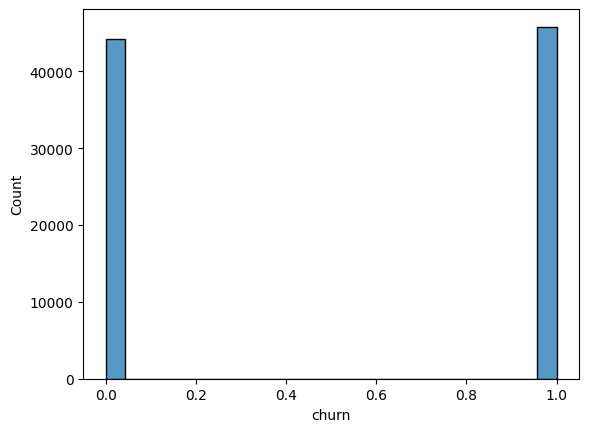

In [53]:
sns.histplot(data=df2, x=target)
plt.show()

In [54]:
print(f"La distribución de la target es: {df2[target].value_counts(normalize=True) * 100}")

La distribución de la target es: churn
1    50.888889
0    49.111111
Name: proportion, dtype: float64


## Analisis Univariable

In [55]:
print(f"Generamos gráficos de distribución 'Histplot' para la lista de variables booleanas: {booleanas}")

Generamos gráficos de distribución 'Histplot' para la lista de variables booleanas: ['asl_flag', 'truck', 'rv', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd', 'ownrent_own', 'refurb_new_refurb', 'infobase_M', 'new_cell', 'dualband']


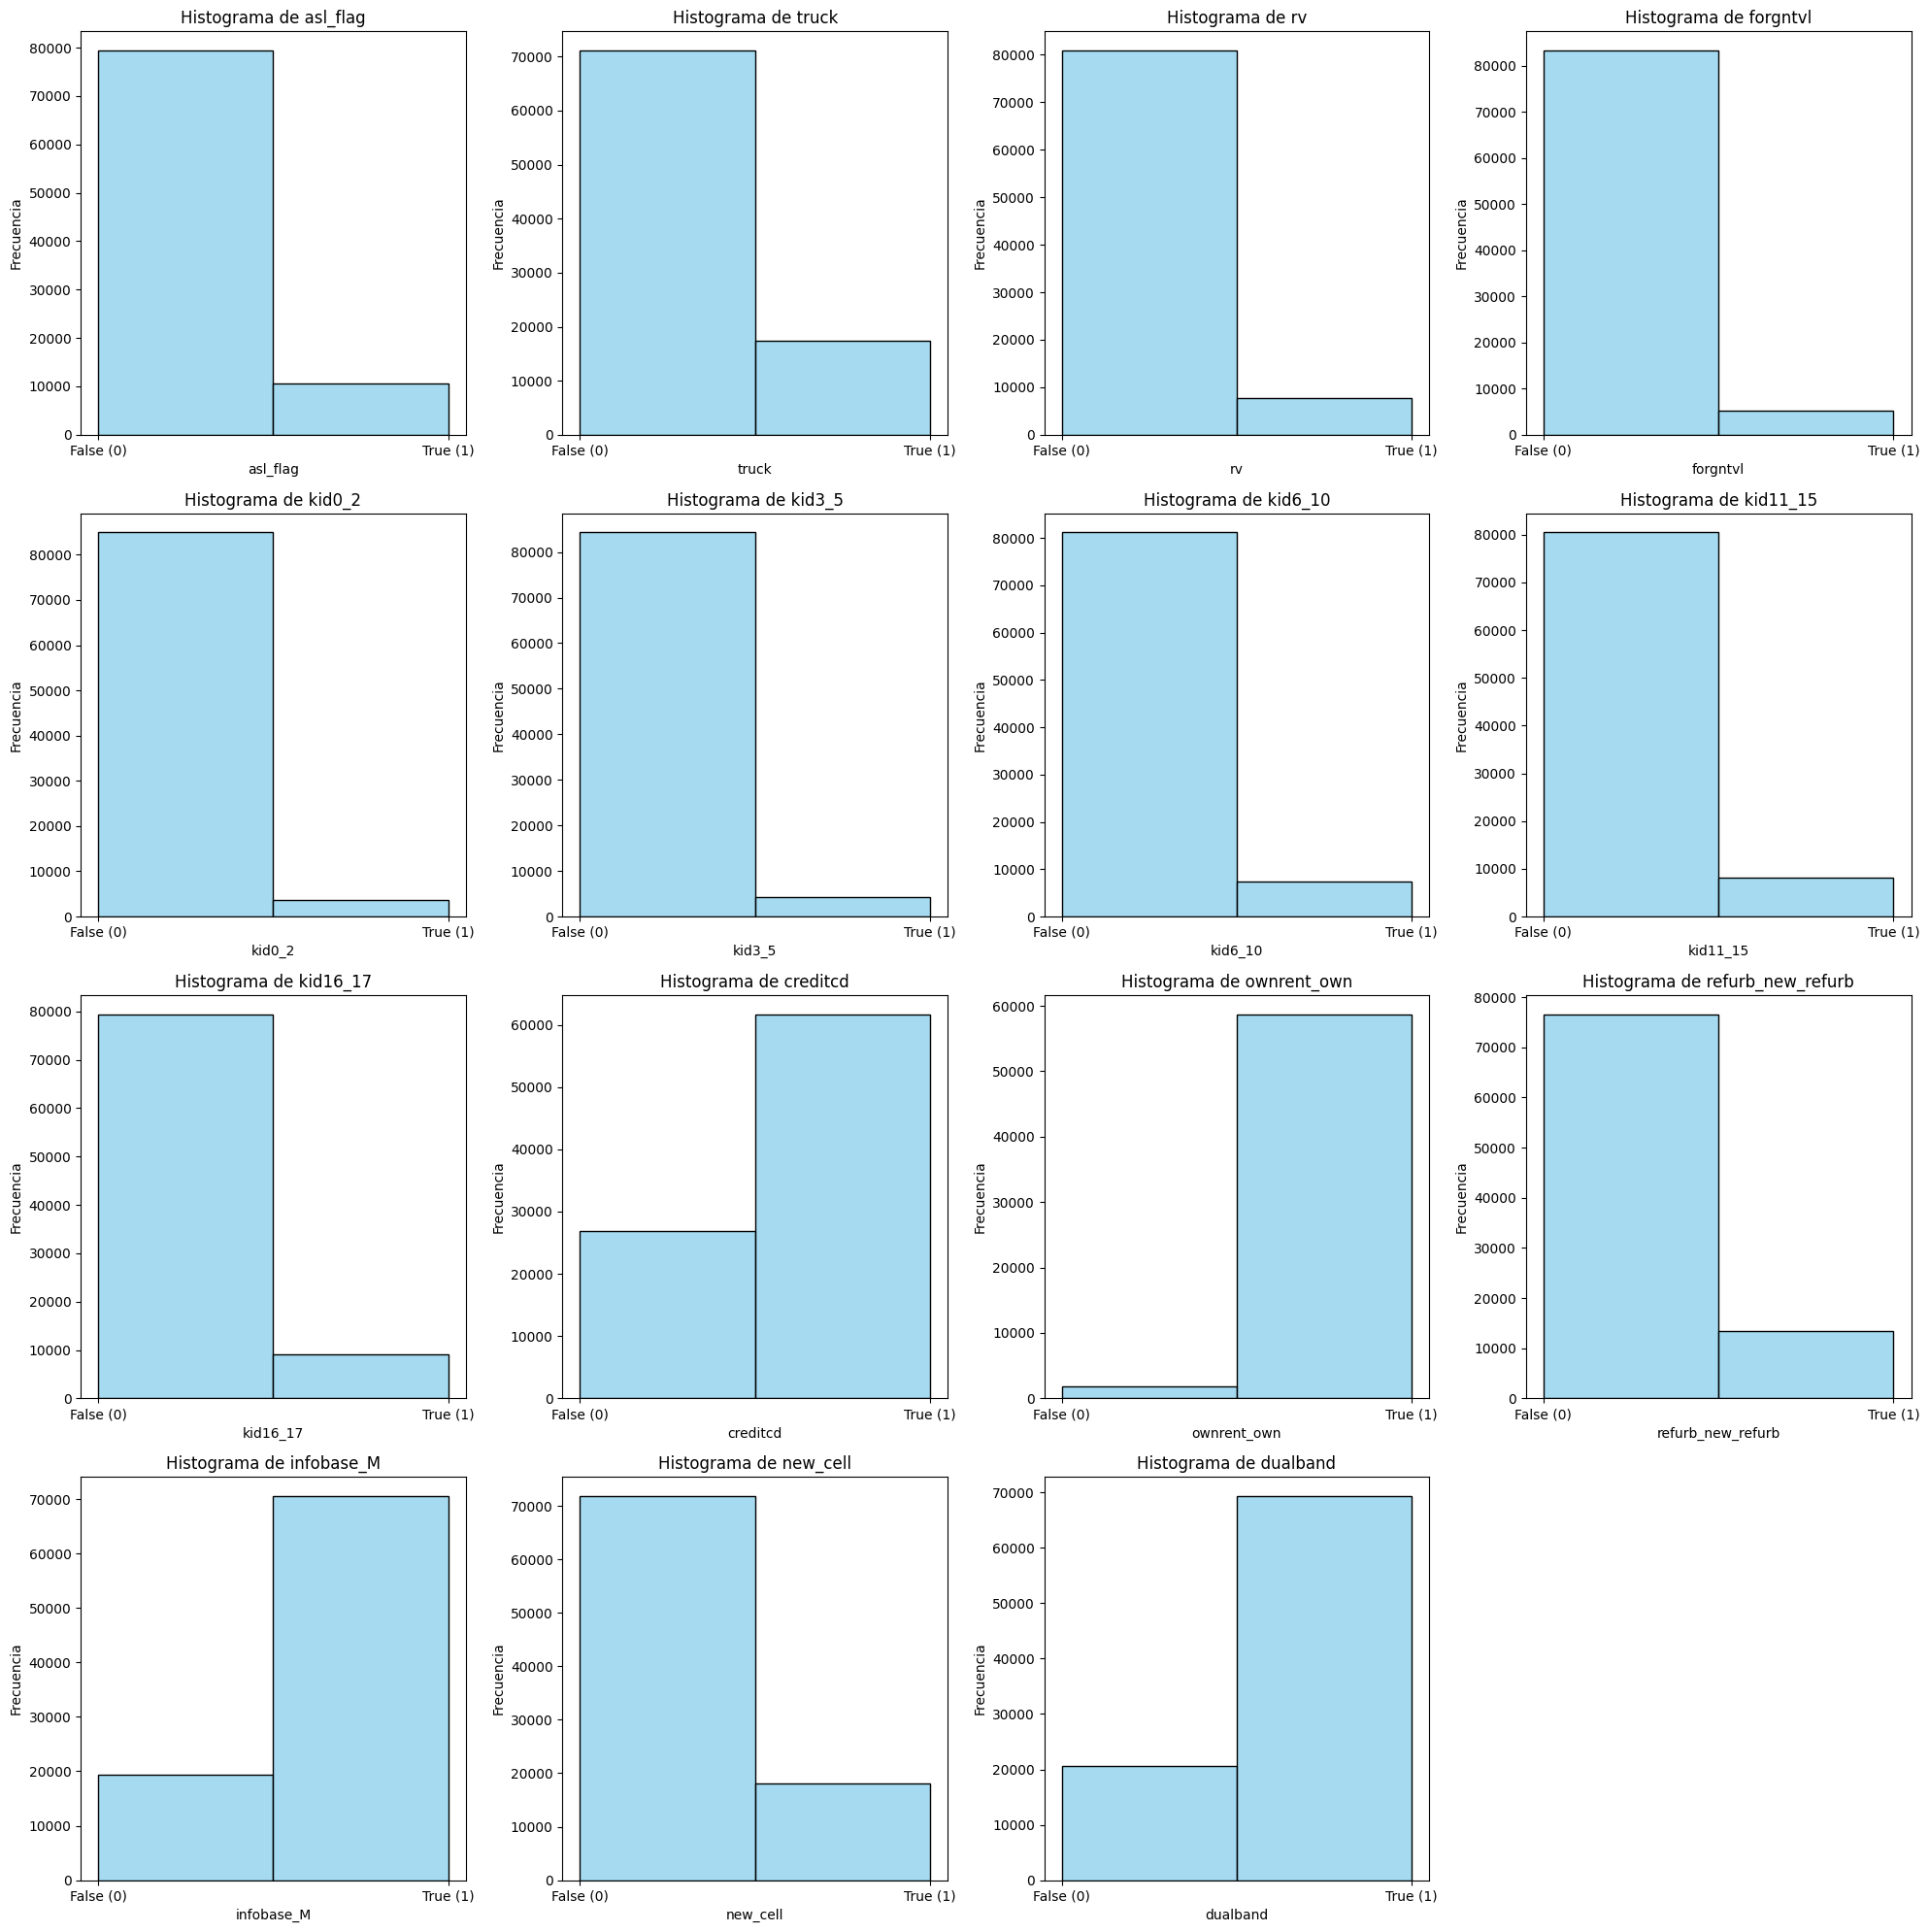

In [56]:
# Configurar el número de gráficos por fila
graficos_por_fila = 4

# Calcular las filas necesarias directamente
filas = (len(booleanas) + graficos_por_fila - 1) // graficos_por_fila  # División entera para redondear hacia arriba

# Crear un objeto de subgráficos
fig, axes = plt.subplots(filas, graficos_por_fila, figsize=(20, 5 * filas))

# Aplanar el arreglo de ejes para facilitar el bucle
axes = axes.flatten()

# Iterar por cada columna booleana y graficar
for i, columna in enumerate(booleanas):
    sns.histplot(data=df2, x=columna, bins=2, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histograma de {columna}")
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel("Frecuencia")
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["False (0)", "True (1)"])

# Apagar ejes vacíos si sobran espacios en la cuadrícula
for j in range(len(booleanas), len(axes)):
    axes[j].axis('off')

# Ajustar el espaciado para evitar solapamientos
plt.tight_layout()
plt.show()

In [57]:
print(f"Generamos gráficos de distribución (Box plot e Histogramas) para las variables numéricas: {numericas}")

Generamos gráficos de distribución (Box plot e Histogramas) para las variables numéricas: ['rev', 'mou', 'totmrc', 'da', 'ovrmou', 'ovrrev', 'vceovr', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_vce', 'plcd_dat', 'recv_vce', 'recv_sms', 'comp_vce', 'comp_dat', 'custcare', 'ccrndmou', 'cc_mou', 'inonemin', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'mou_opkd', 'drop_blk', 'attempt', 'complete', 'callfwdv', 'callwait', 'months', 'uniqsubs', 'actvsubs', 'totcalls', 'totmou', 'totrev', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3mou', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6qty', 'avg6rev', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'income', 'numbcars', 'eqpdays']


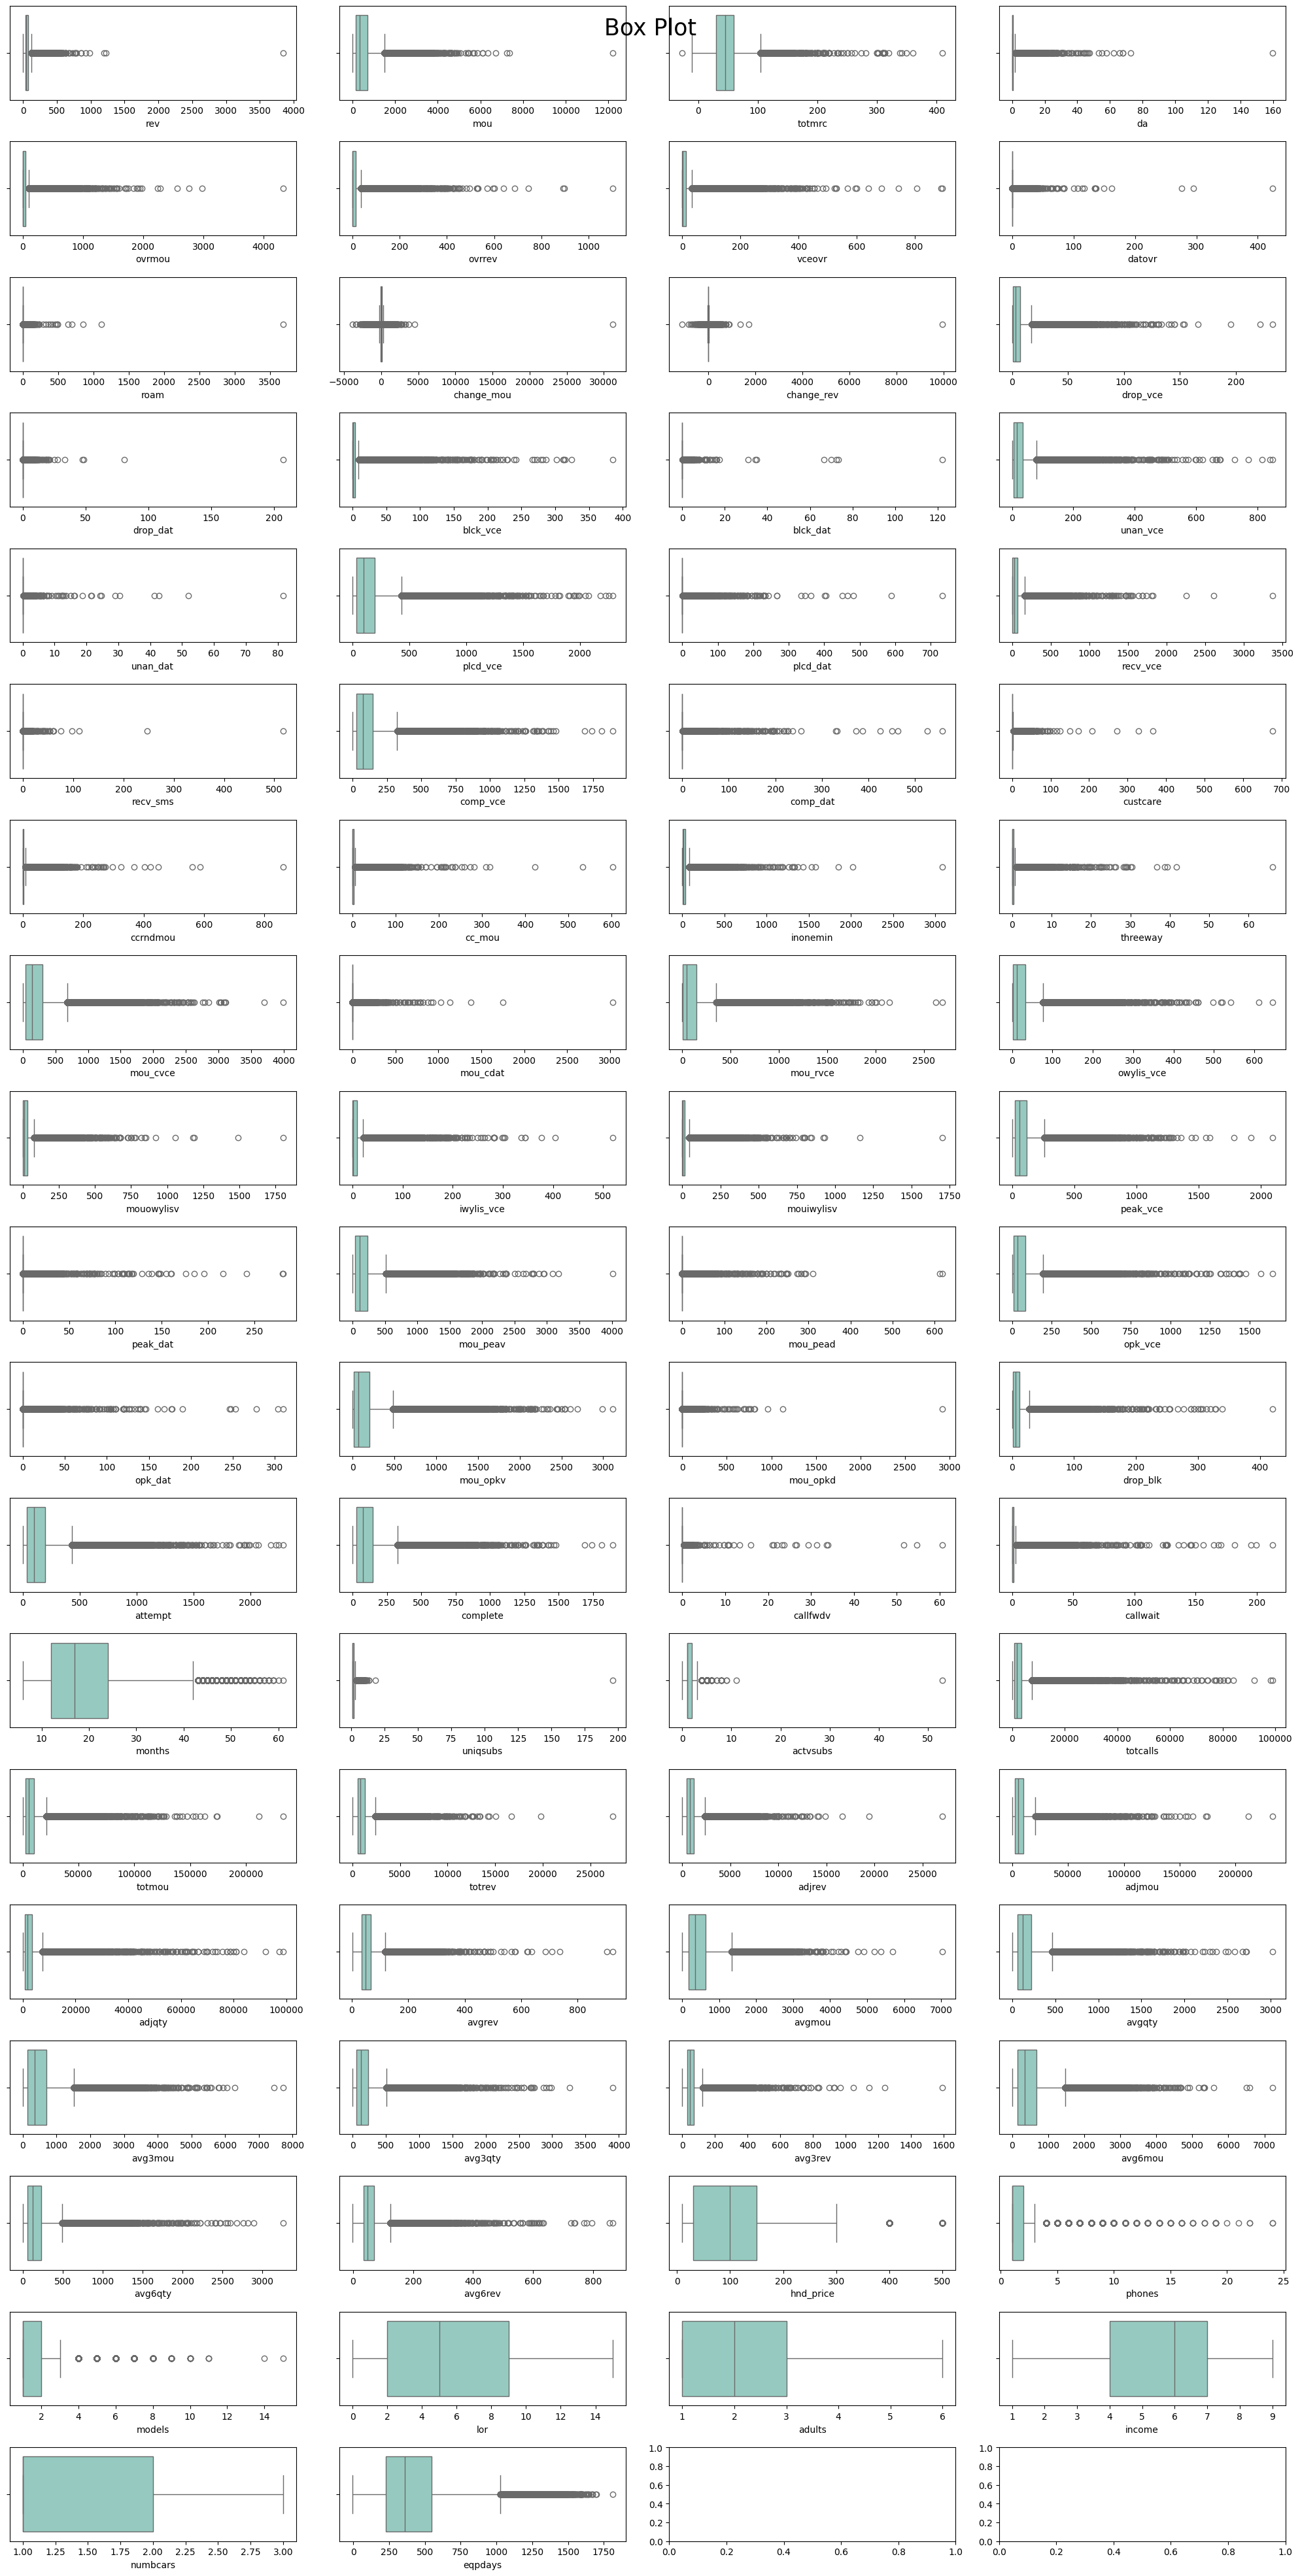

In [58]:
# Box plot de las variables numéricas

fig, ax = plt.subplots(19, 4, figsize = (20, 40))
ax = ax.flatten()

for i, c in enumerate(numericas):
    sns.boxplot(x = df2[c], ax = ax[i], palette = 'Set3')

plt.suptitle('Box Plot', fontsize = 25)
fig.tight_layout()

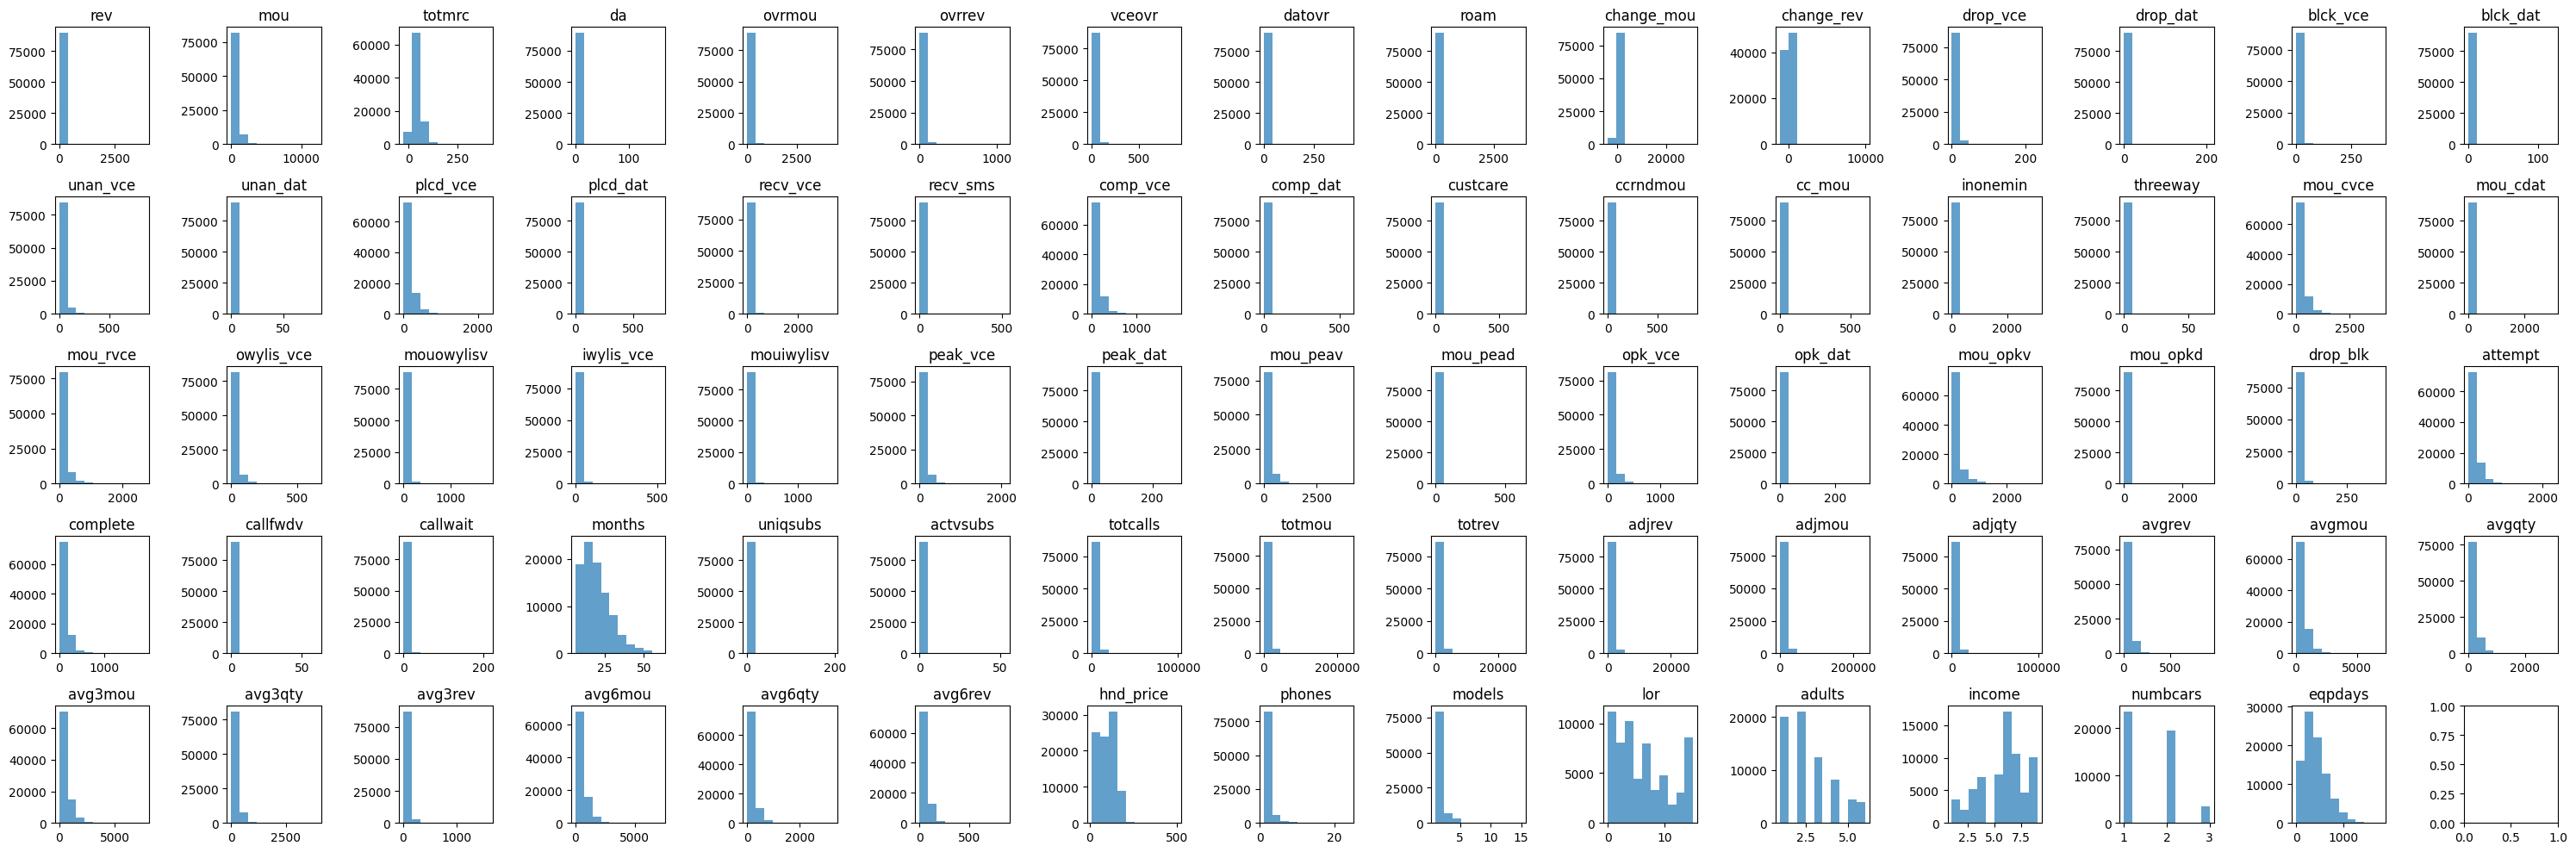

In [59]:
# Generar histogramas para cada variable numérica
fig, axes = plt.subplots(nrows=5, ncols=15, figsize=(30, 10))

for ax, var in zip(axes.flatten(), numericas):
    ax.hist(df2[var], bins=10, alpha=0.7)
    ax.set_title(f'{var}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
print(f"Ploteamos gráficos de distribución 'Histplot' para la lista de variables categóricas: {categoricas}")

Ploteamos gráficos de distribución 'Histplot' para la lista de variables categóricas: ['crclscod', 'prizm_social_one', 'area', 'hnd_webcap', 'dwlltype', 'marital', 'HHstatin', 'dwllsize', 'ethnic', 'Customer_ID']


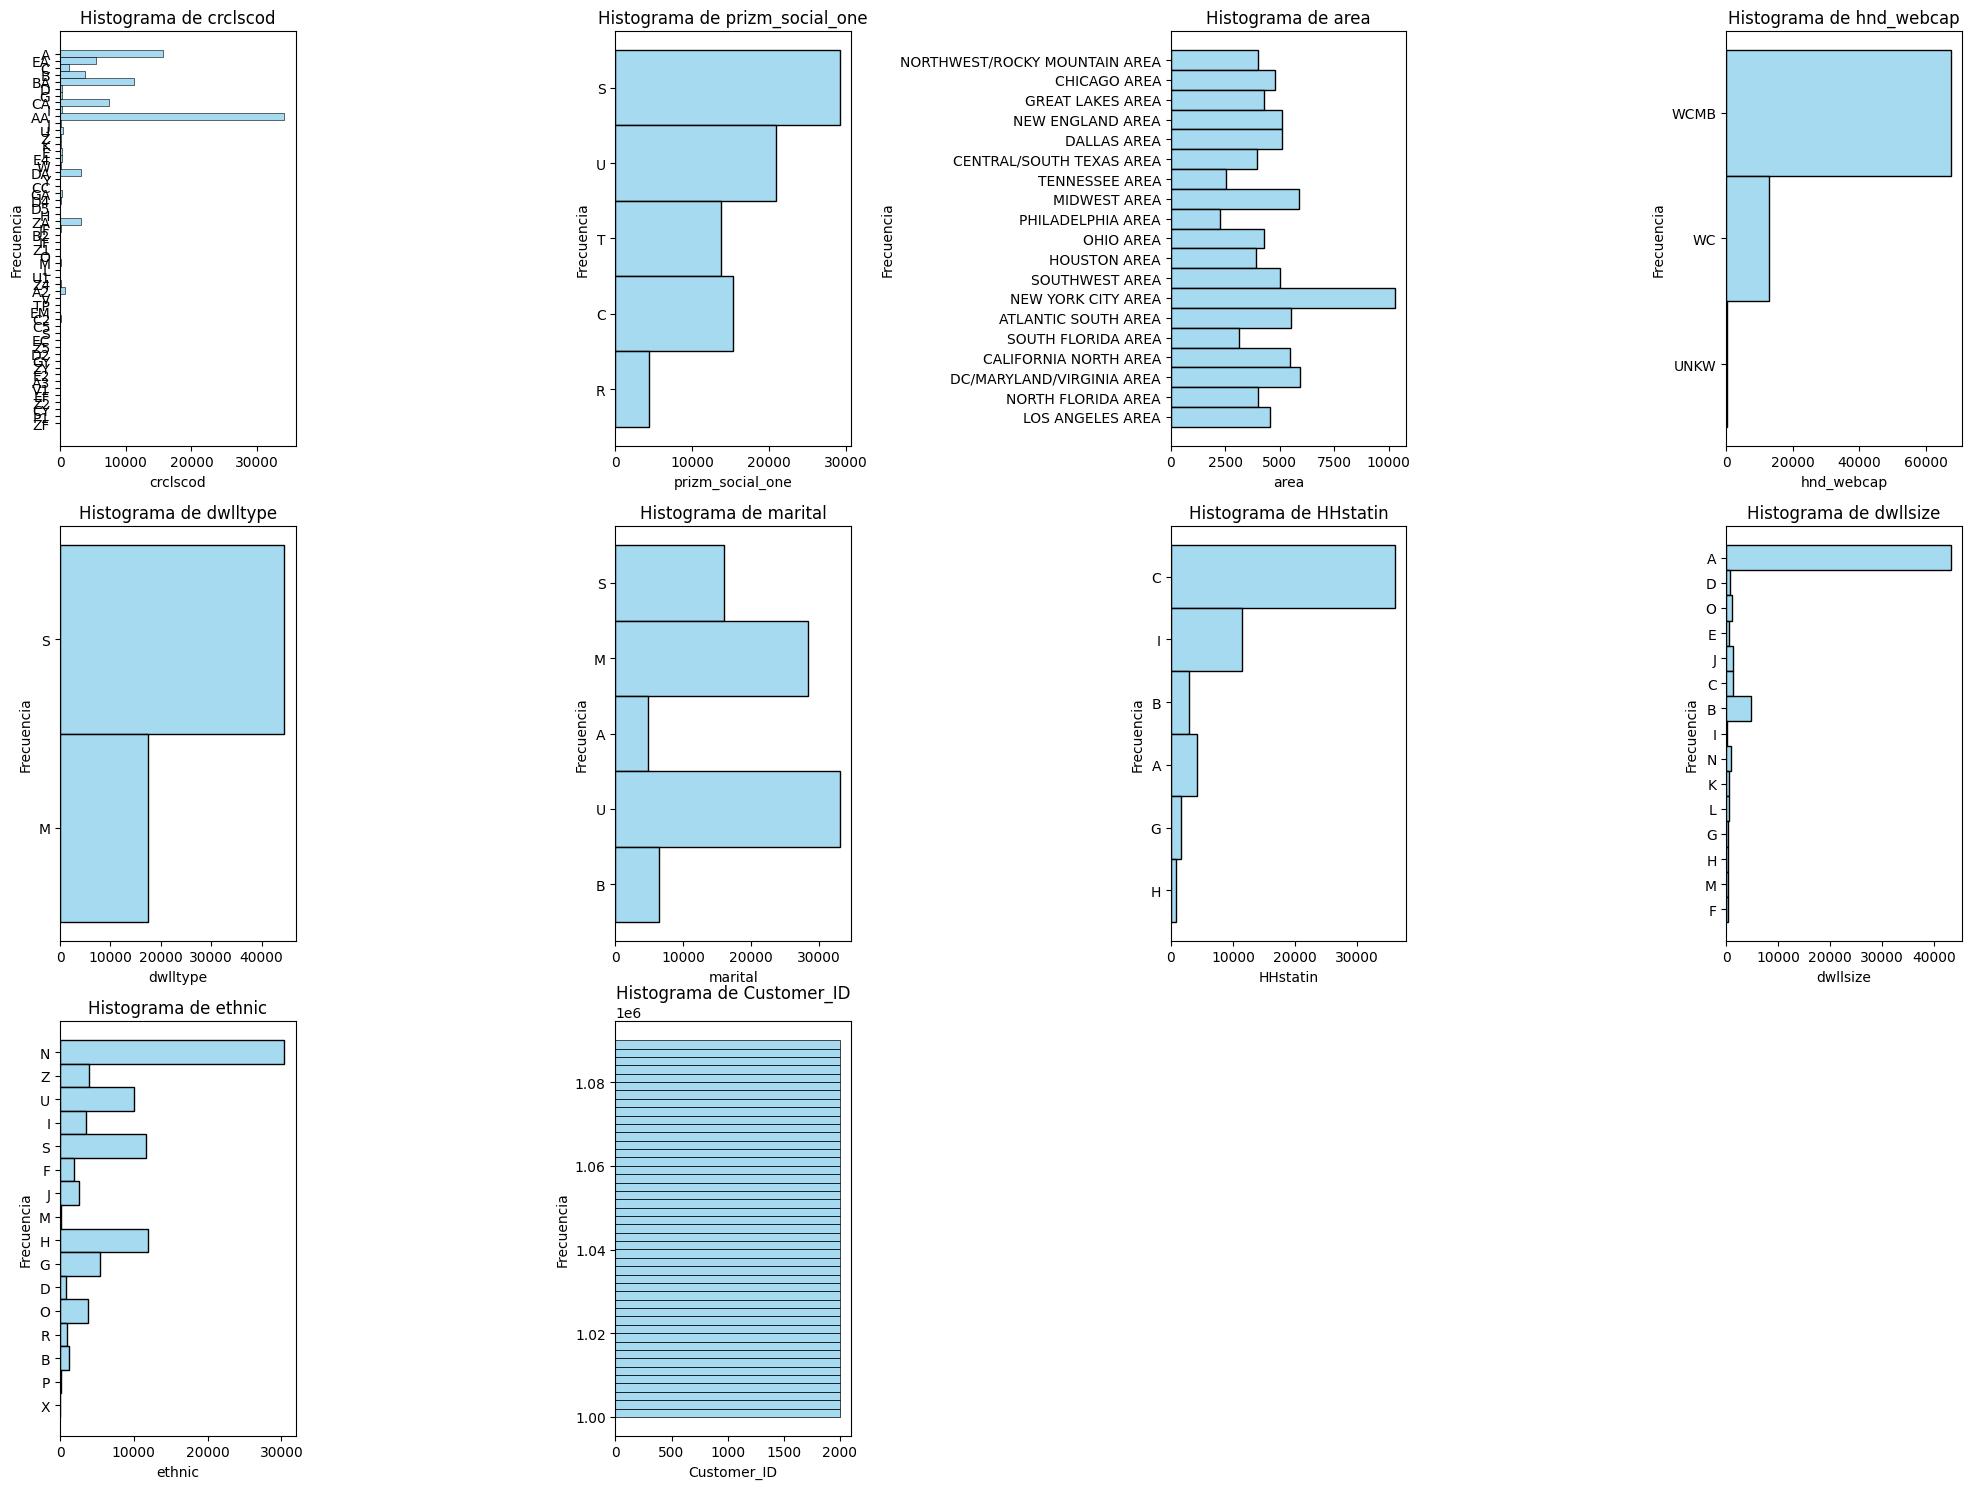

In [61]:
# Configurar el número de gráficos por fila
graficos_por_fila = 4

# Calcular las filas necesarias directamente
filas = (len(categoricas) + graficos_por_fila - 1) // graficos_por_fila  # División entera para redondear hacia arriba

# Crear un objeto de subgráficos
fig, axes = plt.subplots(filas, graficos_por_fila, figsize=(20, 5 * filas))

# Aplanar el arreglo de ejes para facilitar el bucle
axes = axes.flatten()

# Iterar por cada columna booleana y graficar
for i, columna in enumerate(categoricas):
    sns.histplot(data=df2, y=columna, ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histograma de {columna}")
    axes[i].set_xlabel(columna)
    axes[i].set_ylabel("Frecuencia")

# Apagar ejes vacíos si sobran espacios en la cuadrícula
for j in range(len(categoricas), len(axes)):
    axes[j].axis('off')

# Ajustar el espaciado para evitar solapamientos
plt.tight_layout()
plt.show()

In [62]:
len_original = len(df2)

In [63]:
df2.drop(df2[df2['rev']>3000].index, inplace=True)
df2.drop(df2[df2['mou']>10000].index, inplace=True)
df2.drop(df2[df2['da']>140].index, inplace=True)
df2.drop(df2[df2['ovrmou']>4000].index, inplace=True)
df2.drop(df2[df2['ovrrev']>800].index, inplace=True)
df2.drop(df2[df2['vceovr']>800].index, inplace=True)
df2.drop(df2[df2['datovr']>200].index, inplace=True)
df2.drop(df2[df2['roam']>1500].index, inplace=True)
df2.drop(df2[df2['change_mou']>10000].index, inplace=True)
df2.drop(df2[df2['mou']>10000].index, inplace=True)
df2.drop(df2[df2['change_rev']>4000].index, inplace=True)
df2.drop(df2[df2['drop_vce']>200].index, inplace=True)

print("Eliminamos outliers de variables numéricas")

Eliminamos outliers de variables numéricas


In [64]:
len_after_outliers = len(df2)

In [65]:
print(f"Hemos eliminado los outliers evidentes de cada variable numérica a partir de cierto umbral. Eliminando un total de {len_original - len_after_outliers} registros.")

Hemos eliminado los outliers evidentes de cada variable numérica a partir de cierto umbral. Eliminando un total de 10 registros.


## Analisis Variable-Target

In [66]:
print(f"Generamos gráficos 'Stripplot' para analizar la distribución de cada variable numérica con el target: '{target}'")

Generamos gráficos 'Stripplot' para analizar la distribución de cada variable numérica con el target: 'churn'


In [67]:
# Configurar el tamaño del layout
columnas = 5
rows = (len(numericas) + columnas - 1) // columnas
fig, axes = plt.subplots(rows, columnas, figsize=(20, 4 * rows))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Iterar sobre las columnas numéricas y graficar
for i, column in enumerate(numericas):
    sns.stripplot(x=df2[target], y=df2[column], ax=axes[i],
                  jitter=0.2, size=5, alpha=0.7, palette='magma')

    # Configurar título y etiquetas
    axes[i].set_title(f'{target} vs {column}', fontsize=10)
    axes[i].set_xlabel(target, fontsize=8)
    axes[i].set_ylabel(column, fontsize=8)

# Ocultar ejes vacíos si sobran espacios en la cuadrícula
for j in range(len(numericas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño del gráfico
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [68]:
print(f"Para todas las variables numéricas, la distribución del '{target}' es balanceada.")

Para todas las variables numéricas, la distribución del 'churn' es balanceada.


In [69]:
print(f"Generamos gráficos 'Hisplot' para analizar la distribución de cada variable categórica con el target: '{target}'")

Generamos gráficos 'Hisplot' para analizar la distribución de cada variable categórica con el target: 'churn'


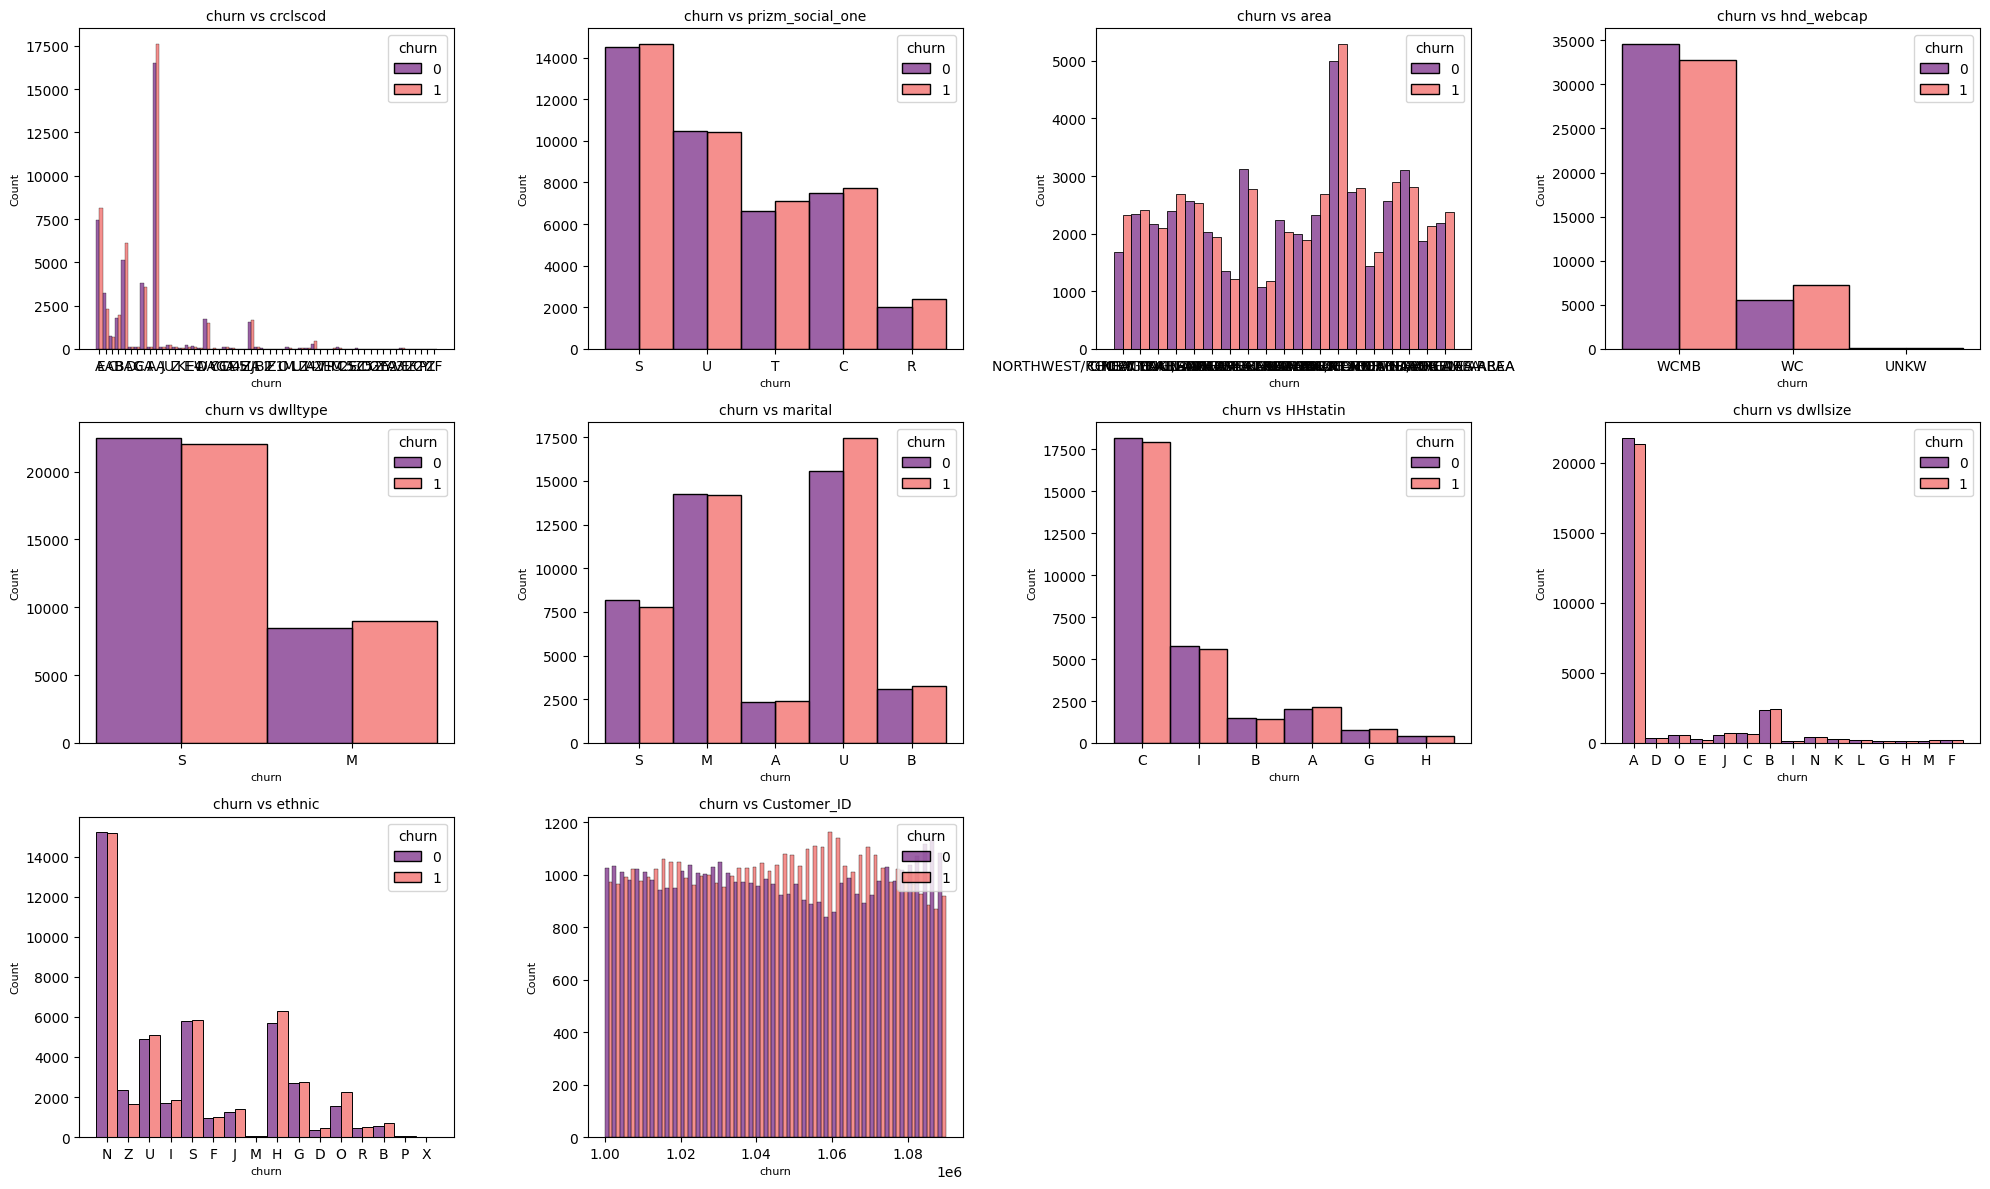

In [70]:
# Configurar el tamaño del layout
columnas = 4
rows = (len(categoricas) + columnas - 1) // columnas
fig, axes = plt.subplots(rows, columnas, figsize=(20, 4 * rows))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Iterar sobre las columnas categóricas y graficar
for i, column in enumerate(categoricas):
    sns.histplot(data=df2, x=column, hue=target, ax=axes[i],
                 multiple='dodge', palette='magma', alpha=0.7)

    # Configurar título y etiquetas
    axes[i].set_title(f'{target} vs {column}', fontsize=10)
    axes[i].set_xlabel(target, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

# Ocultar ejes vacíos si sobran espacios en la cuadrícula
for j in range(len(categoricas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño del gráfico
plt.tight_layout()
plt.show()

In [71]:
print(f"Para cada categoría dentro de las variables categóricas, la distribución del '{target}' es balanceada.")

Para cada categoría dentro de las variables categóricas, la distribución del 'churn' es balanceada.


In [72]:
print(f"Generamos gráficos 'Countplot' para analizar la distribución de cada variable booleana con el target: '{target}'")

Generamos gráficos 'Countplot' para analizar la distribución de cada variable booleana con el target: 'churn'


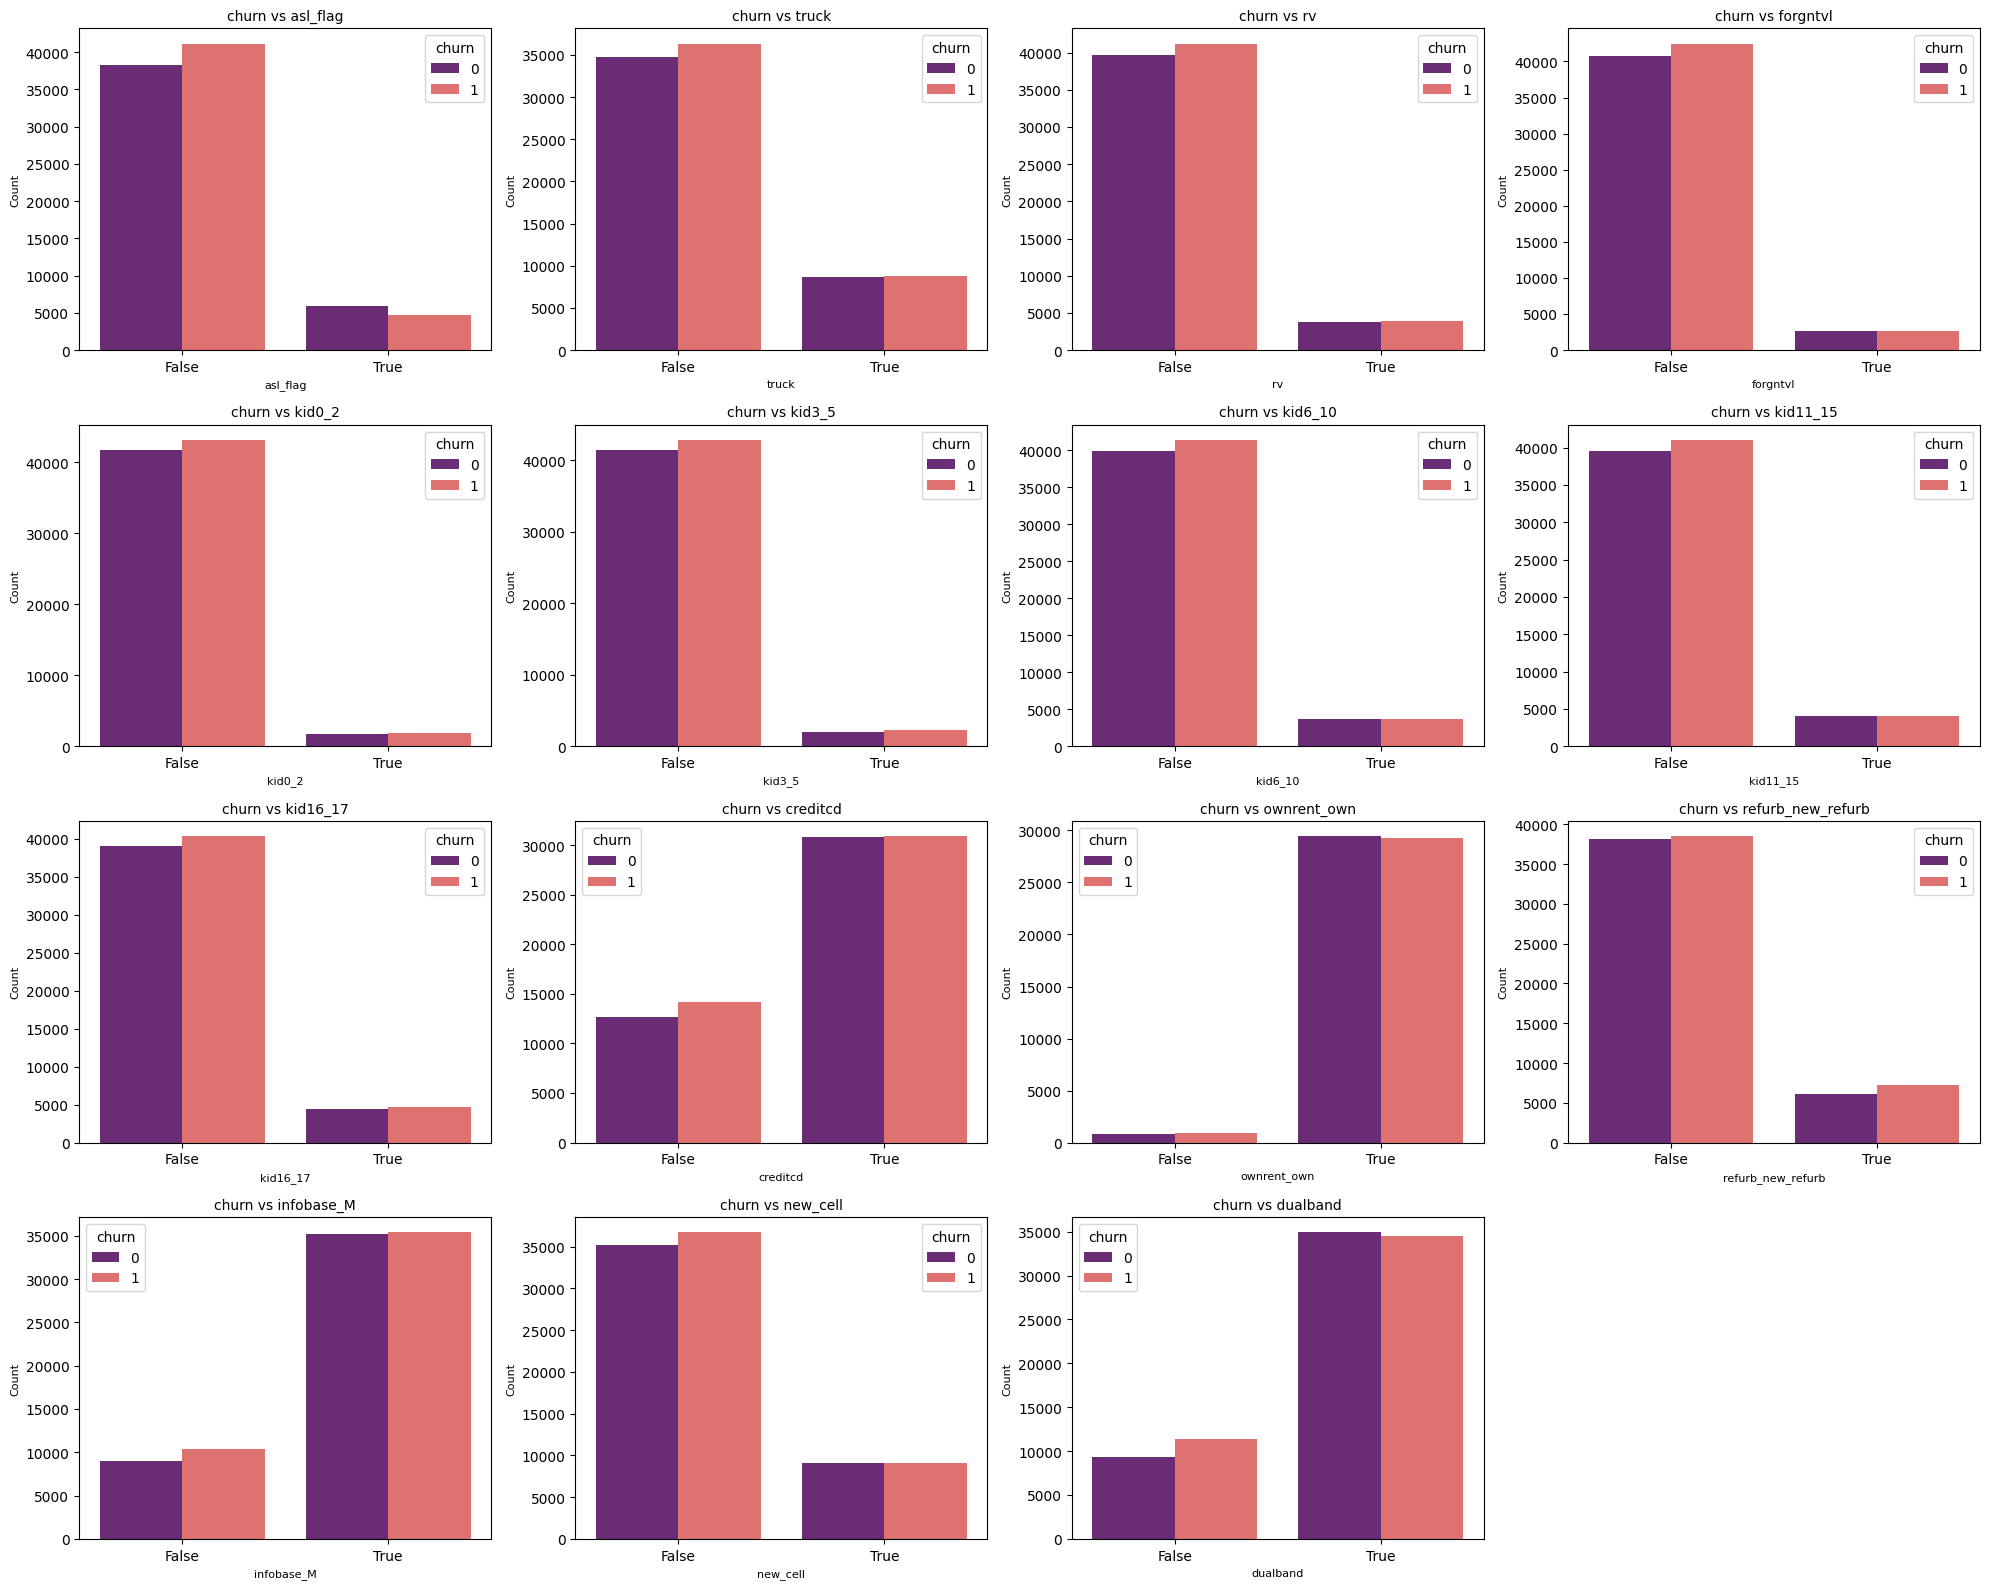

In [73]:
# Configurar el tamaño del layout
columnas = 4
rows = (len(booleanas) + columnas - 1) // columnas
fig, axes = plt.subplots(rows, columnas, figsize=(20, 4 * rows))
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Iterar sobre las columnas booleanas y graficar
for i, column in enumerate(booleanas):
    sns.countplot(data=df2, x=column, hue=target, ax=axes[i], palette='magma')

    # Configurar el rango del eje X para mostrar solo 0 y 1
    axes[i].set_xticks([0, 1])  # Valores explícitos en el eje X
    axes[i].set_xticklabels(['False', 'True'])  # Etiquetas legibles para el eje X

    # Configurar título y etiquetas
    axes[i].set_title(f'{target} vs {column}', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)
    axes[i].legend(title=target)

# Ocultar ejes vacíos si sobran espacios en la cuadrícula
for j in range(len(booleanas), len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño del gráfico
plt.tight_layout()
plt.show()

In [74]:
print(f"Los valores 1 y 0 del '{target}' están balanceados en los valores True y False de las variables booleanas, que tienen una distribución equitativa.")

Los valores 1 y 0 del 'churn' están balanceados en los valores True y False de las variables booleanas, que tienen una distribución equitativa.


# Data Cleaning

In [75]:
# Eliminar filas sin target informado:
df2[df2[target].isnull()]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,hnd_price,phones,models,hnd_webcap,truck,rv,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,ownrent_own,refurb_new_refurb,infobase_M


In [76]:
print(f"Existencia de registros nulos en {target}: {df2[target].isnull().unique()}")

Existencia de registros nulos en churn: [False]


In [77]:
# Eliminar filas duplicadas:
df2[df2.duplicated(keep=False)]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,hnd_price,phones,models,hnd_webcap,truck,rv,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,ownrent_own,refurb_new_refurb,infobase_M


In [78]:
# Comprobamos duplicados en df_predecir
df2_predecir[df2_predecir.duplicated(keep=False)]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,hnd_price,phones,models,hnd_webcap,truck,rv,lor,dwlltype,marital,adults,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,ownrent_own,refurb_new_refurb,infobase_M


In [79]:
print(f"Existencia de duplicados en el df: {df2.duplicated().unique()}")
print(f"Existencia de duplicados en el df_predecir: {df2_predecir.duplicated().unique()}")

Existencia de duplicados en el df: [False]
Existencia de duplicados en el df_predecir: [False]


In [80]:
# Comprobamos que no haya IDs duplicados:
print(f"Existen solo valores únicos en Customer_ID: {df2['Customer_ID'].nunique() == len(df2)}")

Existen solo valores únicos en Customer_ID: True


In [81]:
df2_predecir['Customer_ID'].nunique() == len(df2_predecir)
print(f"Existen solo valores únicos en el df_predecir para Customer_ID: {df2['Customer_ID'].nunique() == len(df2)}")

Existen solo valores únicos en el df_predecir para Customer_ID: True


In [82]:
# Eliminar filas/columnas vacías y columnas irrelevantes:
# Empezamos por eliminar filas con demasiados nulos
# Vemos el numero de filas antes de hacer el filtrado
filas_antes = len(df2)
print(f"Existen {filas_antes} filas en el dataset actualmente")

Existen 89990 filas en el dataset actualmente


In [83]:
filas_antes_pred = len(df2_predecir)
filas_antes_pred
print(f"Existen {filas_antes_pred} filas en el df_predecir actualmente")

Existen 10000 filas en el df_predecir actualmente


In [84]:
# Eliminamos filas con demasiado % de observaciones nulas
umbral_nulos = 8
# Encontramos la cantidad de nulos por fila
nulos = df2.isnull().sum(axis=1)
# Asignamos al df las filas con 8 o menos nulos
df2 = df2[nulos <= umbral_nulos]

print(f"Definimos como {umbral_nulos} el numero máximo de variables nulas por registro")

Definimos como 8 el numero máximo de variables nulas por registro


In [85]:
# Encontramos la cantidad de nulos por fila
nulos = df2_predecir.isnull().sum(axis=1)
# Asignamos al df las filas con 8 o menos nulos
df2_predecir = df2_predecir[nulos <= umbral_nulos]

print(f"Replicamos tratamiento en el df_predecir con el mismo umbral: {umbral_nulos}")

Replicamos tratamiento en el df_predecir con el mismo umbral: 8


In [86]:
# Vemos el numero de filas despues de hacer el filtrado.
filas_despues = len(df2)
print(f"Existen {filas_despues} filas en el dataset luego de eliminar registros")

# Vemos cuantas filas hemos eliminado en el df2
eliminadas = filas_antes - filas_despues
pct_eliminadas = eliminadas / len(df) * 100
print(f"Hemos eliminado {eliminadas} filas. Un {pct_eliminadas}% del dataframe.")

Existen 84123 filas en el dataset luego de eliminar registros
Hemos eliminado 5867 filas. Un 6.518888888888889% del dataframe.


In [87]:
filas_despues_pred = len(df2_predecir)
print(f"Existen {filas_despues_pred} filas en el df_predecir luego de eliminar registros")

# Vemos cuantas filas hemos eliminado en el df2_predecir
eliminadas = filas_antes_pred - filas_despues_pred
pct_eliminadas = eliminadas / len(df_predecir) * 100
print(f"Hemos elimnado {eliminadas} filas en el df_predecir. Un {pct_eliminadas}% del df_predecir.")

Existen 8607 filas en el df_predecir luego de eliminar registros
Hemos elimnado 1393 filas en el df_predecir. Un 13.930000000000001% del df_predecir.


In [88]:
# Eliminar filas/columnas vacías y columnas irrelevantes:

# La columna 'Customer_ID' no aporta informacion relevante para el modelo.
del(df2['Customer_ID'])
categoricas.remove('Customer_ID')

print('Quitamos la columna "Customer_ID" de la lista de categóricas.')

Quitamos la columna "Customer_ID" de la lista de categóricas.


In [89]:
categoricas_predecir.remove('Customer_ID')
print("Replicamos tratamiento en el df_predecir: Quitamos la columna 'Customer_ID' de la lista categóricas.\nLuego la guardaremos en una variable y la eliminaremos del df_predecir tras finalizar tratamiento de nulos y resetear el índice")

Replicamos tratamiento en el df_predecir: Quitamos la columna 'Customer_ID' de la lista categóricas.
Luego la guardaremos en una variable y la eliminaremos del df_predecir tras finalizar tratamiento de nulos y resetear el índice


In [90]:
# Categoricos: Corregir literales incorrectos (acentos, erratas, etc):
for columna in categoricas:
  print(df2[columna].value_counts(dropna=False))

print("\nNo hemos detectado ningún error a corregir")

crclscod
AA    32469
A     14874
BA    10508
CA     6831
EA     5110
B      3531
DA     2910
ZA     2828
C      1340
A2      736
U       388
E       304
E4      255
GA      242
D       220
G       216
JF      177
Z       163
M       146
C2      137
I       100
D4       87
W        72
Z4       69
U1       51
EM       43
B2       41
V1       40
EC       24
O        22
J        19
E2       18
CY       16
CC       16
D5       15
K        15
C5       14
ZY       11
Z1       11
Y        10
Z5        7
H         7
D2        5
GY        5
TP        5
A3        3
Z2        3
IF        3
EF        3
V         1
P1        1
ZF        1
Name: count, dtype: int64
prizm_social_one
S      28263
U      20213
C      14663
T      13313
R       4265
NaN     3406
Name: count, dtype: int64
area
NEW YORK CITY AREA               9703
MIDWEST AREA                     5517
DC/MARYLAND/VIRGINIA AREA        5481
ATLANTIC SOUTH AREA              5117
CALIFORNIA NORTH AREA            5086
DALLAS AREA              

In [91]:
# Comprobamos la lista categóricas del df_predecir
for columna in categoricas_predecir:
  print(df2_predecir[columna].value_counts(dropna=False))

print("\nNo hemos detectado ningún error a corregir en el df_predecir")

crclscod
AA    2105
BA    1234
A     1211
CA     811
EA     759
E4     435
DA     389
B      329
ZA     253
D4     162
CY     148
Z4     130
ZY      91
D5      91
A2      79
C5      57
B2      56
Z5      43
U       36
C       35
GY      26
C2      24
GA      14
M       13
EC      13
W       11
U1       9
EM       8
E        6
CC       5
J        4
Z        3
G        3
E2       2
P1       2
H        1
D        1
K        1
Z2       1
JF       1
O        1
L        1
Z1       1
Y        1
I        1
Name: count, dtype: int64
prizm_social_one
S      2626
U      2406
C      1598
T      1172
R       474
NaN     331
Name: count, dtype: int64
area
LOS ANGELES AREA                 1777
SOUTHWEST AREA                   1000
NEW YORK CITY AREA                725
DC/MARYLAND/VIRGINIA AREA         553
ATLANTIC SOUTH AREA               489
MIDWEST AREA                      400
HOUSTON AREA                      389
CALIFORNIA NORTH AREA             378
GREAT LAKES AREA                  342
CHICAGO 

# Imputación de nulos y agrupacion de valores

In [92]:
# TRATAMIENTO DE NULOS POR TIPO DE COLUMNA:

print('''Se hará tratamiento de nulos individual para cada una de las variables con mayor % de nulos.
Para el resto se aplicará un mismo criterio:

CATEGORICAS
Imputar a los nulos en las categoricas 'Unknown'

BOOLEANAS
Imputar la moda

NUMERICAS
Imputar la media

Además se agrupará en las variables categoricas con "otros" para los valores debajo de cierto umbral (5 o 10 %)''')

Se hará tratamiento de nulos individual para cada una de las variables con mayor % de nulos.
Para el resto se aplicará un mismo criterio:

CATEGORICAS
Imputar a los nulos en las categoricas 'Unknown'

BOOLEANAS
Imputar la moda

NUMERICAS
Imputar la media

Además se agrupará en las variables categoricas con "otros" para los valores debajo de cierto umbral (5 o 10 %)


* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

### Imputación de nulos: Variables con mayor %





In [93]:
df2[categoricas].isnull().sum().sort_values(ascending=False)

,0
dwllsize,27961
HHstatin,27252
dwlltype,22180
hnd_webcap,8002
prizm_social_one,3406
area,32
crclscod,0
marital,0
ethnic,0


In [94]:
df2[booleanas].isnull().sum().sort_values(ascending=False)

,0
ownrent_own,23685
asl_flag,0
truck,0
rv,0
forgntvl,0
kid0_2,0
kid3_5,0
kid6_10,0
kid11_15,0
kid16_17,0


In [95]:
df2[numericas].isnull().sum().sort_values(ascending=False)

,0
numbcars,37746
lor,20709
income,16405
adults,14289
avg6qty,900
...,...
cc_mou,0
ccrndmou,0
custcare,0
comp_dat,0


In [96]:
# Vamos a imputar empezando por las columnas con el porcentaje mas alto de nulos.

porcentaje_nulos = df2.isnull().sum()
porcentaje_nulos = (porcentaje_nulos / len(df2)) * 100
porcentaje_nulos = porcentaje_nulos.sort_values(ascending=False)
porcentaje_nulos.head(20)

,0
numbcars,44.870012
dwllsize,33.238234
HHstatin,32.395421
ownrent_own,28.155201
dwlltype,26.366154
lor,24.617524
income,19.501207
adults,16.985842
hnd_webcap,9.512262
prizm_social_one,4.048833


#### 1. numbcars

In [97]:
df2['numbcars'].value_counts(dropna=False, normalize=True) * 100

,proportion
numbcars,
NaN,44.870012
1.0,27.891302
2.0,23.117340
3.0,4.121346


In [98]:
df2_predecir['numbcars'].value_counts(dropna=False, normalize=True) * 100

,proportion
numbcars,
NaN,52.259789
1.0,23.887533
2.0,21.308237
3.0,2.544441


In [99]:
# Como la columna representa el numero de coches "conocidos" por cliente, entendemos e imputamos los nulos con 0.

df2['numbcars'] = df2['numbcars'].fillna(0.0)
print(f"Se rellenan los nulos de 'numbcars' con {df2['numbcars'].isnull().sum()}, representando la ausencia de la característica")

Se rellenan los nulos de 'numbcars' con 0, representando la ausencia de la característica


In [100]:
df2_predecir['numbcars'] = df2_predecir['numbcars'].fillna(0.0)
print(f"Se replica tratamiento en el df_predecir: Se rellenan los nulos para 'numbcars' con {df2_predecir['numbcars'].isnull().sum()}")


Se replica tratamiento en el df_predecir: Se rellenan los nulos para 'numbcars' con 0


#### 2. dwllsize

In [101]:
df2['dwllsize'].value_counts(normalize=True, dropna=False) * 100

,proportion
dwllsize,
A,51.190519
NaN,33.238234
B,5.634606
C,1.610737
J,1.518015
O,1.279079
N,1.075806
D,0.803585
K,0.707298


In [102]:
df2_predecir['dwllsize'].value_counts(normalize=True, dropna=False) * 100

,proportion
dwllsize,
A,46.345997
NaN,38.015569
B,5.298013
J,1.696294
C,1.603346
N,1.092134
O,1.080516
D,0.790055
K,0.743581


In [103]:
df2['dwllsize'] = df2['dwllsize'].fillna('UNKW')
print("Se imputan los nulos de 'dwllsize' con 'UNKW'")

Se imputan los nulos de 'dwllsize' con 'UNKW'


In [104]:
df2_predecir['dwllsize'] = df2_predecir['dwllsize'].fillna('UNKW')
print("Se imputan los nulos en el df_predecir de 'dwllsize' con 'UNKW'")

Se imputan los nulos en el df_predecir de 'dwllsize' con 'UNKW'


In [105]:
ValoresMenos10 = df2['dwllsize'].value_counts(normalize=True) < 0.1

lista_resultados = ValoresMenos10[ValoresMenos10].index.tolist()

for i in lista_resultados:
    df2.loc[df2['dwllsize'] == i, 'dwllsize'] = 'Otros'

print("Se agrupan valores de 'dwllsize' que representan menos del 10%")

Se agrupan valores de 'dwllsize' que representan menos del 10%


In [106]:
ValoresMenos10_predecir = df2_predecir['dwllsize'].value_counts(normalize=True) < 0.1

lista_resultados = ValoresMenos10_predecir[ValoresMenos10_predecir].index.tolist()

for i in lista_resultados:
    df2_predecir.loc[df2_predecir['dwllsize'] == i, 'dwllsize'] = 'Otros'

print("Se agrupan valores en el df_predecir de 'dwllsize' que representan menos del 10%")

Se agrupan valores en el df_predecir de 'dwllsize' que representan menos del 10%


In [107]:
df2['dwllsize'].value_counts(normalize=True, dropna=False)

,proportion
dwllsize,
A,0.511905
UNKW,0.332382
Otros,0.155712


In [108]:
df2_predecir['dwllsize'].value_counts(normalize=True, dropna=False)

,proportion
dwllsize,
A,0.463460
UNKW,0.380156
Otros,0.156384


#### 3. HHstatin

In [109]:
df2['HHstatin'].value_counts(dropna=False)

,count
HHstatin,
C,36041
NaN,27252
I,11371
A,4171
B,2902
G,1558
H,828


In [110]:
df2_predecir['HHstatin'].value_counts(dropna=False)

,count
HHstatin,
NaN,3655
C,2941
I,938
A,455
B,323
G,204
H,91


In [111]:
# Aqui parece que las columnas podrían tener valor ordenal, pero como no sabemos si A es mayor que I o al revés
# Tendremos que hacer un one-hot encoding, por lo tanto podemos imputar "UNKW" como nueva categoría a los nulos.

df2['HHstatin'] = df2['HHstatin'].fillna('UNKW')
print("Se imputan los nulos de 'HHstatin' con 'UNKW'")

Se imputan los nulos de 'HHstatin' con 'UNKW'


In [112]:
df2_predecir['HHstatin'] = df2_predecir['HHstatin'].fillna('UNKW')
print("Se imputan los nulos en el df_predecir de 'HHstatin' con 'UNKW'")

Se imputan los nulos en el df_predecir de 'HHstatin' con 'UNKW'


In [113]:
ValoresMenos10 = df2['HHstatin'].value_counts(normalize=True) < 0.1

lista_resultados = ValoresMenos10[ValoresMenos10].index.tolist()

for i in lista_resultados:
    df2.loc[df2['HHstatin'] == i, 'HHstatin'] = 'Otros'

print("Se agrupan valores de 'HHstatin' que representan menos del 10%")

Se agrupan valores de 'HHstatin' que representan menos del 10%


In [114]:
ValoresMenos10_pred = df2_predecir['HHstatin'].value_counts(normalize=True) < 0.1

lista_resultados = ValoresMenos10_pred[ValoresMenos10_pred].index.tolist()

for i in lista_resultados:
    df2_predecir.loc[df_predecir['HHstatin'] == i, 'HHstatin'] = 'Otros'

print("Se agrupan valores en el df_predecir de 'HHstatin' que representan menos del 10%")

Se agrupan valores en el df_predecir de 'HHstatin' que representan menos del 10%


In [115]:
df2['HHstatin'].value_counts(normalize=True, dropna=False)

,proportion
HHstatin,
C,0.428432
UNKW,0.323954
I,0.135171
Otros,0.112442


In [116]:
df2_predecir['HHstatin'].value_counts(normalize=True, dropna=False)

,proportion
HHstatin,
UNKW,0.424654
C,0.341699
Otros,0.124666
I,0.108981


#### 4. ownrent_own

In [117]:
df2['ownrent_own'].value_counts(dropna=False)

,count
ownrent_own,
1,58663
<NA>,23685
0,1775


In [118]:
df2_predecir['ownrent_own'].value_counts(dropna=False)

,count
ownrent_own,
1,5404
<NA>,2977
0,226


In [119]:
df2['ownrent_own'] = df2['ownrent_own'].fillna(list(df2['ownrent_own'].mode())[0])
print("Se imputan los nulos de 'ownrent_own' con la MODA")

Se imputan los nulos de 'ownrent_own' con la MODA


In [120]:
df2_predecir['ownrent_own'] = df2_predecir['ownrent_own'].fillna(list(df2_predecir['ownrent_own'].mode())[0])
print("Se imputan los nulos en el df_predecir de 'ownrent_own' con la MODA")

Se imputan los nulos en el df_predecir de 'ownrent_own' con la MODA


#### 5. dwlltype

In [121]:
df2['dwlltype'].value_counts(dropna=False)

,count
dwlltype,
S,44463
NaN,22180
M,17480


In [122]:
df2_predecir['dwlltype'].value_counts(dropna=False)

,count
dwlltype,
S,4126
NaN,2693
M,1788


In [123]:
df2['dwlltype'] = df2['dwlltype'].fillna('UNKW')
print("Se imputan los nulos de 'dwlltype' con 'UNKW'")

Se imputan los nulos de 'dwlltype' con 'UNKW'


In [124]:
df2_predecir['dwlltype'] = df2_predecir['dwlltype'].fillna('UNKW')
print("Se imputan los nulos en el df_predecir de 'dwlltype' con 'UNKW'")

Se imputan los nulos en el df_predecir de 'dwlltype' con 'UNKW'


#### 6. lor

In [125]:
df2['lor'].value_counts(dropna=False, normalize=True) * 100

,proportion
lor,
NaN,24.617524
1.0,10.898327
2.0,9.603794
15.0,8.875100
3.0,6.277712
4.0,5.852145
5.0,5.300572
6.0,4.816756
7.0,4.627747


In [126]:
df2_predecir['lor'].value_counts(dropna=False, normalize=True) * 100

,proportion
lor,
NaN,28.500058
2.0,10.224236
1.0,9.457418
15.0,7.877309
3.0,6.320437
4.0,5.390961
5.0,5.321250
6.0,4.844894
7.0,4.205879


In [127]:
# Encontramos la media de lor segun adults, ya que existe cierta relación para proceder la imputación
media = df2.groupby('adults')['lor'].apply(lambda x: x.mean().astype(int).astype(float)).to_dict()

# Asignamos la media a los nulos
df2['lor'] = df2['lor'].fillna(df2['adults'].map(media))
print("Se imputan los nulos de 'lor' con la MEDIA agrupada según 'adults'")

Se imputan los nulos de 'lor' con la MEDIA agrupada según 'adults'


In [128]:
# Encontramos la media de lor segun adults
media_p = df2_predecir.groupby('adults')['lor'].apply(lambda x: x.mean().astype(int).astype(float)).to_dict()

# Asignamos la media a los nulos
df2_predecir['lor'] = df2_predecir['lor'].fillna(df2_predecir['adults'].map(media_p))
print("Se imputan los nulos de df_predecir 'lor' con la MEDIA agrupada según 'adults'")

Se imputan los nulos de df_predecir 'lor' con la MEDIA agrupada según 'adults'


In [129]:
df2['lor'] = df2['lor'].fillna(df2['lor'].mean().astype(int).astype(float))
print("Los nulos pendientes de imputar en 'lor' por la imposibilidad de cálculo agrupado, se imputan con la MEDIA general")

Los nulos pendientes de imputar en 'lor' por la imposibilidad de cálculo agrupado, se imputan con la MEDIA general


In [130]:
df2_predecir['lor'] = df2_predecir['lor'].fillna(df2_predecir['lor'].mean().astype(int).astype(float))
print("Los nulos pendientes de imputar en df_predecir en'lor' por la imposibilidad de cálculo agrupado, se imputan con la MEDIA general")

Los nulos pendientes de imputar en df_predecir en'lor' por la imposibilidad de cálculo agrupado, se imputan con la MEDIA general


#### 7. income

In [131]:
# income es una columna numérica. No la trataremos como un caso especial.
# La tratamos mas abajo junto al resto de variables numéricas, de forma mas automática con un bucle.
df2['income'].value_counts(dropna=False)

,count
income,
6.0,17106
NaN,16405
7.0,10587
9.0,10043
5.0,7442
4.0,7036
3.0,5244
8.0,4703
1.0,3545


#### 8. adults

In [132]:
# adults es una columna numérica, con alto % nulos, pero no la trataremos como un caso especial.
# La trataremos mas abajo junto al resto de variables numéricas, de forma mas automática con un bucle.
df2['adults'].value_counts(dropna=False)

,count
adults,
2.0,20992
1.0,19980
NaN,14289
3.0,12427
4.0,8074
5.0,4403
6.0,3958


#### 9. hnd_webcap

In [133]:
df2['hnd_webcap'].value_counts(dropna=False)

,count
hnd_webcap,
WCMB,63724
WC,12236
NaN,8002
UNKW,161


In [134]:
df2_predecir['hnd_webcap'].value_counts(dropna=False)

,count
hnd_webcap,
WCMB,7266
WC,795
NaN,526
UNKW,20


In [135]:
df2['hnd_webcap'] = df2['hnd_webcap'].fillna('UNKW')
print("Se imputan los nulos de 'hnd_webcap' con 'UNKW'")

Se imputan los nulos de 'hnd_webcap' con 'UNKW'


In [136]:
df2_predecir['hnd_webcap'] = df2_predecir['hnd_webcap'].fillna('UNKW')
print("Se imputan los nulos en df_predecir de 'hnd_webcap' con 'UNKW'")

Se imputan los nulos en df_predecir de 'hnd_webcap' con 'UNKW'


#### 10. prizm_social_one

In [137]:
df2['prizm_social_one'].value_counts(dropna=False, normalize=True) * 100

,proportion
prizm_social_one,
S,33.597233
U,24.027912
C,17.430429
T,15.825636
R,5.069957
NaN,4.048833


In [138]:
df2_predecir['prizm_social_one'].value_counts(dropna=False, normalize=True) * 100

,proportion
prizm_social_one,
S,30.510050
U,27.953991
C,18.566283
T,13.616824
R,5.507145
NaN,3.845707


In [139]:
df2['prizm_social_one'] = df2['prizm_social_one'].fillna('UNKW')
print("Se imputan los nulos de 'prizm_social_one' con 'UNKW'")

Se imputan los nulos de 'prizm_social_one' con 'UNKW'


In [140]:
df2_predecir['prizm_social_one'] = df2_predecir['prizm_social_one'].fillna('UNKW')
print("Se imputan los nulos en df_predecir de 'prizm_social_one' con 'UNKW'")

Se imputan los nulos en df_predecir de 'prizm_social_one' con 'UNKW'



### Imputación de nulos: Resto de variables

#### Variables Booleanas

In [141]:
df2[booleanas].isnull().sum()

,0
asl_flag,0
truck,0
rv,0
forgntvl,0
kid0_2,0
kid3_5,0
kid6_10,0
kid11_15,0
kid16_17,0
creditcd,0


In [142]:
print(f"Existencia de nulos en lista booleanas: {df2[booleanas].isnull().sum().sum()}")

Existencia de nulos en lista booleanas: 0


In [143]:
df2_predecir[booleanas_predecir].isnull().sum()

,0
asl_flag,0
truck,0
rv,0
forgntvl,0
kid0_2,0
kid3_5,0
kid6_10,0
kid11_15,0
kid16_17,0
creditcd,0


In [144]:
print(f"Existencia de nulos en lista booleanas del df_predecir: {df2_predecir[booleanas_predecir].isnull().sum().sum()}")
print("Ya no existen nulos en las variables booleanas en ninguno de los df")

Existencia de nulos en lista booleanas del df_predecir: 0
Ya no existen nulos en las variables booleanas en ninguno de los df


#### Variables Numericas

In [145]:
df2[numericas].isnull().sum().sort_values(ascending=False)

,0
income,16405
adults,14289
avg6rev,900
avg6qty,900
avg6mou,900
...,...
cc_mou,0
ccrndmou,0
custcare,0
comp_dat,0


In [146]:
for columna in numericas:
    # Cantidad de valores nulos en la columna
    cantidad_nulos = df2[columna].isnull().sum()

    if cantidad_nulos < 100:
        # si es menos de 100 se borran los valores
        df2 = df2[df2[columna].notnull()]
    else:
        # si tiene  mas de 100 nulos se le asigna la media
        media = df2[columna].mean()
        df2[columna].fillna(media, inplace=True)


print("Se imputan los nulos de las variables numéricas con la media para las variables con más de 100 observaciones nulas, en caso contrario se eliminan")

Se imputan los nulos de las variables numéricas con la media para las variables con más de 100 observaciones nulas, en caso contrario se eliminan


In [147]:
print(f"Existencia de nulos en lista numéricas: {df2[numericas].isnull().sum().sum()}")

Existencia de nulos en lista numéricas: 0


In [148]:
df2_predecir[numericas_predecir].isnull().sum().sort_values(ascending=False)

,0
income,2030
adults,1814
avg6rev,869
avg6qty,869
avg6mou,869
...,...
cc_mou,0
ccrndmou,0
custcare,0
comp_dat,0


In [149]:
for columna in numericas_predecir:
    # Cantidad de valores nulos en la columna
    cantidad_nulos = df2_predecir[columna].isnull().sum()

    if cantidad_nulos < 100:
        # si es menos de 100 se borran los valores
        df2_predecir = df2_predecir[df2_predecir[columna].notnull()]
    else:
        # si tiene  mas de 100 nulos se le asigna la media
        media = df2_predecir[columna].mean()
        df2_predecir[columna].fillna(media, inplace=True)

print("Se imputan los nulos de las variables numéricas del df_predecir con la media para las variables con más de 100 observaciones nulas, en caso contrario se eliminan")

Se imputan los nulos de las variables numéricas del df_predecir con la media para las variables con más de 100 observaciones nulas, en caso contrario se eliminan


In [150]:
print(f"Existencia de nulos en lista numéricas del df_predecir: {df2_predecir[numericas_predecir].isnull().sum().sum()}")

Existencia de nulos en lista numéricas del df_predecir: 0


#### Variables Categoricas

In [151]:
df2[categoricas].isnull().sum().sort_values(ascending=False)

,0
area,32
crclscod,0
prizm_social_one,0
hnd_webcap,0
dwlltype,0
marital,0
HHstatin,0
dwllsize,0
ethnic,0


In [152]:
print(f"Existencia de nulos en lista categóricas: {df2[categoricas].isnull().sum().sum()}\nAún existen nulos para 1 variable: 'area'")

Existencia de nulos en lista categóricas: 32
Aún existen nulos para 1 variable: 'area'


In [153]:
df2_predecir[categoricas_predecir].isnull().sum().sort_values()

,0
crclscod,0
prizm_social_one,0
area,0
hnd_webcap,0
dwlltype,0
marital,0
HHstatin,0
dwllsize,0
ethnic,0


In [154]:
print(f"Existencia de nulos en lista categóricas del df_predecir: {df2_predecir[categoricas_predecir].isnull().sum().sum()}")

Existencia de nulos en lista categóricas del df_predecir: 0


##### Tratamiento de nulos: area

In [155]:
df2['area'].value_counts(dropna=False, normalize=True) * 100

,proportion
area,
NEW YORK CITY AREA,11.534301
MIDWEST AREA,6.558254
DC/MARYLAND/VIRGINIA AREA,6.515460
ATLANTIC SOUTH AREA,6.082760
CALIFORNIA NORTH AREA,6.045909
DALLAS AREA,5.711874
NEW ENGLAND AREA,5.629852
SOUTHWEST AREA,5.519299
CHICAGO AREA,5.342178


In [156]:
df2_predecir['area'].value_counts(dropna=False, normalize=True) * 100

,proportion
area,
LOS ANGELES AREA,20.449173
SOUTHWEST AREA,11.347518
NEW YORK CITY AREA,8.475177
DC/MARYLAND/VIRGINIA AREA,6.418440
ATLANTIC SOUTH AREA,5.756501
MIDWEST AREA,4.669031
HOUSTON AREA,4.503546
CALIFORNIA NORTH AREA,4.444444
GREAT LAKES AREA,3.995272


In [157]:
df2 = df2.dropna(subset=['area'])

print("Eliminamos los registros nulos en el df, ya que representan un % muy bajo.")

Eliminamos los registros nulos en el df, ya que representan un % muy bajo.


In [158]:
print(f"Existencia de nulos en lista categóricas: {df2[categoricas].isnull().sum().sum()}")
print(f"Existencia de nulos en lista categóricas del df_predecir: {df2_predecir[categoricas_predecir].isnull().sum().sum()}")

Existencia de nulos en lista categóricas: 0
Existencia de nulos en lista categóricas del df_predecir: 0


### Agrupaciones de variables categóricas

#### area

In [159]:
#Crear diccionario de las iniciales de la ciudad

areas = df2['area'].value_counts().index.to_list()

diccionario_area = {}

for area in areas:
    # Separar por '/' si existe, de lo contrario por espacio
    if '/' in area:
        partes_separadas = area.split('/')
    else:
        partes_separadas = area.split(' ')

    # Dividir cada palabra adicionalmente por espacio
    palabras = []
    for segmento in partes_separadas:
        palabras.extend(segmento.split(' '))

    # Generar iniciales excluyendo "AREA"
    iniciales = [palabra[0] for palabra in palabras if palabra != 'AREA']

    # Agregar las iniciales al diccionario
    diccionario_area[area] = ''.join(iniciales)

print(f"Creamos el siguiente diccionario de mapeo:\n{diccionario_area}")

Creamos el siguiente diccionario de mapeo:
{'NEW YORK CITY AREA': 'NYC', 'MIDWEST AREA': 'M', 'DC/MARYLAND/VIRGINIA AREA': 'DMV', 'ATLANTIC SOUTH AREA': 'AS', 'CALIFORNIA NORTH AREA': 'CN', 'DALLAS AREA': 'D', 'NEW ENGLAND AREA': 'NE', 'SOUTHWEST AREA': 'S', 'CHICAGO AREA': 'C', 'LOS ANGELES AREA': 'LA', 'GREAT LAKES AREA': 'GL', 'OHIO AREA': 'O', 'NORTH FLORIDA AREA': 'NF', 'NORTHWEST/ROCKY MOUNTAIN AREA': 'NRM', 'CENTRAL/SOUTH TEXAS AREA': 'CST', 'HOUSTON AREA': 'H', 'SOUTH FLORIDA AREA': 'SF', 'TENNESSEE AREA': 'T', 'PHILADELPHIA AREA': 'P'}


In [160]:
df2['area'] = df2['area'].map(diccionario_area)
print("Reemplazamos los valores originales de area por las abreviaciones con un 'map'")

Reemplazamos los valores originales de area por las abreviaciones con un 'map'


In [161]:
df2['area'].value_counts()

,count
area,
NYC,9703
M,5517
DMV,5481
AS,5117
CN,5086
D,4805
NE,4736
S,4643
C,4494


In [162]:
df2_predecir['area'].value_counts()

,count
area,
LOS ANGELES AREA,1730
SOUTHWEST AREA,960
NEW YORK CITY AREA,717
DC/MARYLAND/VIRGINIA AREA,543
ATLANTIC SOUTH AREA,487
MIDWEST AREA,395
HOUSTON AREA,381
CALIFORNIA NORTH AREA,376
GREAT LAKES AREA,338


In [163]:
df2_predecir['area'] = df2_predecir['area'].map(diccionario_area)
print("Realizamos mismo tratamiento en df_predecir: Reemplazamos los valores originales de area por las abreviaciones con el mismo diccionario de mapeo.")

Realizamos mismo tratamiento en df_predecir: Reemplazamos los valores originales de area por las abreviaciones con el mismo diccionario de mapeo.


In [164]:
df2_predecir['area'].value_counts(dropna=False)

,count
area,
LA,1730
S,960
NYC,717
DMV,543
AS,487
M,395
H,381
CN,376
GL,338


In [165]:
print(f"Existencia de diferentes categorías en 'area' para ambos df: {df2_predecir['area'].nunique() - df2['area'].nunique()}")

Existencia de diferentes categorías en 'area' para ambos df: 0


#### crclscod

In [166]:
df2['crclscod'].value_counts(normalize=True)*100

,proportion
crclscod,
AA,38.595093
A,17.677278
BA,12.492419
CA,8.120964
EA,6.076750
B,4.196644
DA,3.460537
ZA,3.363023
C,1.592323


In [167]:
ValoresMenos5 = df2['crclscod'].value_counts(normalize=True) < 0.05

lista_resultados = ValoresMenos5[ValoresMenos5].index.tolist()

for i in lista_resultados:
    df2.loc[df2['crclscod'] == i, 'crclscod'] = 'Otros'

print("Agrupamos categorías de valores para 'crclscod' que suman menos de 5% del dataset")

Agrupamos categorías de valores para 'crclscod' que suman menos de 5% del dataset


In [168]:
df2['crclscod'].value_counts(normalize=True)*100

,proportion
crclscod,
AA,38.595093
A,17.677278
Otros,17.037495
BA,12.492419
CA,8.120964
EA,6.076750


In [169]:
df2_predecir['crclscod'].value_counts(normalize=True)

,proportion
crclscod,
AA,0.246690
BA,0.144208
A,0.136052
CA,0.095035
EA,0.088889
E4,0.050946
DA,0.045508
B,0.038061
ZA,0.029669


In [170]:
ValoresMenos8_pred = df2_predecir['crclscod'].value_counts(normalize=True) < 0.08

lista_resultados = ValoresMenos8_pred[ValoresMenos8_pred].index.tolist()

for i in lista_resultados:
    df2_predecir.loc[df2_predecir['crclscod'] == i, 'crclscod'] = 'Otros'

print("Replicamos tratamiento al df_predecir: Agrupamos categorías de valores para 'crclscod' que suman menos de 8% del dataset, para hacer coincidir ambos df")

Replicamos tratamiento al df_predecir: Agrupamos categorías de valores para 'crclscod' que suman menos de 8% del dataset, para hacer coincidir ambos df


In [171]:
df2_predecir['crclscod'].value_counts(normalize=True)*100

,proportion
crclscod,
Otros,28.912530
AA,24.669031
BA,14.420804
A,13.605201
CA,9.503546
EA,8.888889


#### ethnic

In [172]:
df2['ethnic'].value_counts(normalize=True)*100

,proportion
ethnic,
N,34.410341
H,13.473499
S,13.133391
U,11.168853
G,6.184966
Z,4.511779
O,4.319130
I,4.006374
J,2.987240


In [173]:
ValoresMenos5 = df2['ethnic'].value_counts(normalize=True) < 0.05

lista_resultados = ValoresMenos5[ValoresMenos5].index.tolist()

for i in lista_resultados:
    df2.loc[df2['ethnic'] == i, 'ethnic'] = 'Otros'

print("Agrupamos categorías de valores para 'ethnic' que suman menos de 5% del dataset")

Agrupamos categorías de valores para 'ethnic' que suman menos de 5% del dataset


In [174]:
df2['ethnic'].value_counts(normalize=True)*100

,proportion
ethnic,
N,34.410341
Otros,21.628950
H,13.473499
S,13.133391
U,11.168853
G,6.184966


In [175]:
df_predecir['ethnic'].value_counts(normalize=True)*100

,proportion
ethnic,
N,30.754193
H,16.997634
S,11.554687
U,9.959872
G,4.712419
Z,4.578660
P,4.053915
O,3.981891
I,3.107316


In [176]:
ValoresMenos5_pred = df2_predecir['ethnic'].value_counts(normalize=True) < 0.05

lista_resultados = ValoresMenos5_pred[ValoresMenos5_pred].index.tolist()

for i in lista_resultados:
    df2_predecir.loc[(df_predecir['ethnic'] == i) & (i != 'G'), 'ethnic'] = 'Otros'

print("Replicamos tratamiento al df_predecir: Agrupamos categorías de valores para 'ethnic' que suman menos de 5% del dataset")

Replicamos tratamiento al df_predecir: Agrupamos categorías de valores para 'ethnic' que suman menos de 5% del dataset


In [177]:
df2_predecir['ethnic'].value_counts(normalize=True)*100

,proportion
ethnic,
N,30.780142
Otros,26.158392
H,17.222222
S,11.501182
U,9.586288
G,4.751773


# Guardar variable Customer_ID

In [178]:
df2.reset_index(drop=True,inplace=True)

In [179]:
df2_predecir.reset_index(drop=True,inplace=True)

In [180]:
ClientesPredecir=df2_predecir['Customer_ID']
print("Guardamos la variable 'Customer_ID' del df_predecir para luego cononcer las predicciones sobre los clientes")

Guardamos la variable 'Customer_ID' del df_predecir para luego cononcer las predicciones sobre los clientes


In [181]:
ClientesPredecir

,Customer_ID
0,1090001
1,1090002
2,1090003
3,1090004
4,1090005
...,...
8455,1099982
8456,1099985
8457,1099986
8458,1099987


In [182]:
pd.to_pickle(ClientesPredecir,'/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/df_pred_Customer_ID.pkl')
del(df2_predecir['Customer_ID'])
print("Guardamos la variable a predecir en un 'Pickle'.\nEliminamos la variable 'Customer_ID' del df_predecir, ya que no aporta al modelo")

Guardamos la variable a predecir en un 'Pickle'.
Eliminamos la variable 'Customer_ID' del df_predecir, ya que no aporta al modelo


# Encoding categóricos

* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [183]:
for col in categoricas:
  print(col)
  print(df2[col].unique())
  print(40*'-')

crclscod
['A' 'EA' 'Otros' 'BA' 'CA' 'AA']
----------------------------------------
prizm_social_one
['S' 'U' 'T' 'C' 'UNKW' 'R']
----------------------------------------
area
['NRM' 'C' 'GL' 'NE' 'D' 'CST' 'T' 'M' 'P' 'O' 'H' 'S' 'NYC' 'AS' 'SF'
 'CN' 'DMV' 'NF' 'LA']
----------------------------------------
hnd_webcap
['WCMB' 'WC' 'UNKW']
----------------------------------------
dwlltype
['S' 'M' 'UNKW']
----------------------------------------
marital
['S' 'M' 'A' 'U' 'B']
----------------------------------------
HHstatin
['C' 'I' 'UNKW' 'Otros']
----------------------------------------
dwllsize
['A' 'Otros' 'UNKW']
----------------------------------------
ethnic
['N' 'Otros' 'U' 'S' 'H' 'G']
----------------------------------------


In [184]:
df3 = pd.get_dummies(data= df2, dtype='int', columns=categoricas)
print("Creamos un nuevo df y aplicamos 'One Hot Encoding' a todas las variables categóricas.")

Creamos un nuevo df y aplicamos 'One Hot Encoding' a todas las variables categóricas.


In [185]:
df3

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,dualband,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,ownrent_own,refurb_new_refurb,infobase_M,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_Otros,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_UNKW,area_AS,area_C,area_CN,area_CST,area_D,area_DMV,area_GL,area_H,area_LA,area_M,area_NE,area_NF,area_NRM,area_NYC,area_O,area_P,area_S,area_SF,area_T,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,dwlltype_M,dwlltype_S,dwlltype_UNKW,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_C,HHstatin_I,HHstatin_Otros,HHstatin_UNKW,dwllsize_A,dwllsize_Otros,dwllsize_UNKW,ethnic_G,ethnic_H,ethnic_N,ethnic_Otros,ethnic_S,ethnic_U
0,23.9975,219.25,22.500,0.2475,0.00,0.000,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,52.333333,0.000000,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,0,0,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.00000,136.000000,38.00000,1,149.989990,2.0,2.0,0,0,15.0,1.0,4.0,3.0,0,0,0,0,0,0,1,361.0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,57.4925,482.75,37.425,0.2475,22.75,9.100,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,263.333333,0.000000,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,0,0,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.00000,275.000000,48.00000,0,100.304682,7.0,6.0,1,1,1.0,1.0,5.0,1.0,0,0,0,0,0,0,1,240.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,16.9900,10.25,16.990,0.0000,0.00,0.000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,9.000000,0.000000,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,1,0,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.00000,6.000000,17.00000,0,29.989990,2.0,1.0,0,0,7.0,2.0,5.0,2.0,0,0,1,0,0,0,1,1504.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,38.0000,7.50,38.000,0.0000,0.00,0.000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,3.666667,0.000000,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,1,0,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.00000,25.000000,40.00000,0,29.989990,1.0,1.0,0,0,6.0,4.0,6.0,1.0,0,1,0,0,0,0,1,1812.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,

In [186]:
df3_predecir = pd.get_dummies(data=df2_predecir,  dtype='int', columns=categoricas_predecir)
print("Replicamos tratamiento en df_predecir: Creamos un nuevo df y aplicamos 'One Hot Encoding' a todas las variables categóricas.")

Replicamos tratamiento en df_predecir: Creamos un nuevo df y aplicamos 'One Hot Encoding' a todas las variables categóricas.


In [187]:
df3_predecir

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_vce,plcd_dat,recv_vce,recv_sms,comp_vce,comp_dat,custcare,ccrndmou,cc_mou,inonemin,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,attempt,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,dualband,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,ownrent_own,refurb_new_refurb,infobase_M,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_Otros,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_UNKW,area_AS,area_C,area_CN,area_CST,area_D,area_DMV,area_GL,area_H,area_LA,area_M,area_NE,area_NF,area_NRM,area_NYC,area_O,area_P,area_S,area_SF,area_T,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,dwlltype_M,dwlltype_S,dwlltype_UNKW,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_C,HHstatin_I,HHstatin_Otros,HHstatin_UNKW,dwllsize_A,dwllsize_Otros,dwllsize_UNKW,ethnic_G,ethnic_H,ethnic_N,ethnic_Otros,ethnic_S,ethnic_U
0,30.835000,136.750000,29.9900,0.2475,1.250000,0.500000,0.500000,0.000,0.0975,48.250000,1.155000,2.000000,0.000000,10.333333,0.0,13.333333,0.0,66.000000,0.000000,3.333333,0.0,40.666667,0.000000,1.333333,1.333333,0.896667,0.666667,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.000000,54.500000,0.000000,13.666667,0.000000,22.653333,0.000000,12.333333,66.000000,40.666667,0.0,0.000000,7,1,1,0,0,393,958.0,248.46,182.94,958.0,393,30.49,159.67,65.50,121,52,30,160.0,66.0,31.0,1,149.98999,1.0,1.0,0,0,3.0,1.000000,3.000000,0.0,1,0,0,0,0,0,1,216.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,35.847500,352.750000,24.2700,0.4950,23.250000,9.285000,8.700000,0.585,1.8000,-352.750000,-35.847500,9.000000,0.000000,0.000000,0.0,10.000000,0.0,82.666667,1.000000,31.000000,0.0,65.333333,1.000000,3.666667,9.000000,5.890000,18.333333,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.000000,106.926667,0.000000,43.666667,1.000000,75.283333,1.023333,9.000000,83.666667,66.333333,0.0,1.333333,7,1,1,0,1,1641,4011.0,391.87,305.59,3998.0,1634,50.93,666.33,272.33,470,181,48,666.0,272.0,51.0,1,99.98999,2.0,1.0,0,0,5.0,2.459525,5.492848,0.0,0,0,0,0,0,0,0,101.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
2,30.327500,241.500000,39.9900,0.0000,0.000000,0.000000,0.000000,0.000,0.0000,-86.500000,0.862500,2.000000,0.000000,4.666667,0.0,20.666667,0.0,85.333333,0.000000,26.666667,0.0,59.333333,0.000000,4.333333,6.333333,4.466667,17.000000,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.000000,76.356667,0.000000,36.000000,0.000000,94.543333,0.000000,6.666667,85.333333,59.333333,0.0,0.333333,9,2,2,1,0,780,1889.0,312.91,219.45,1772.0,734,31.35,253.14,104.86,270,107,30,273.0,109.0,31.0,0,129.98999,1.0,1.0,1,0,13.0,3.000000,6.000000,1.0,0,0,0,0,0,0,1,262.0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,154.692500,2297.000000,149.9900,4.7025,0.000000,0.000000,0.000000,0.000,0.0000,119.000000,0.247500,20.333333,0.000000,5.000000,0.0,329.333333,0.0,1067.000000,0.000000,628.000000,0.0,723.000000,0.000000,0.333333,0.666667,0.376667,408.000000,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.000000,961.736667,0.000000,346.000000,0.000000,486.420000,0.000000,25.333333,1067.000000,723.000000,0.0,8.333333,11,1,1,0,0,9018,18478.0,2217.05,2131.17,18478.0,9018,213.12,1847.80,9

#### Comprobacion número de columnas

In [188]:
df3_columnas = df3.columns.to_list()
df3_columnas.remove('churn')

In [189]:
df3_predecir_columnas = df3_predecir.columns.to_list()

In [190]:
for col in df3_columnas:
    if col in df3_predecir_columnas:
        df3_predecir_columnas.remove(col)
print(f"Diferencia en cantidad de columnas en ambos df, sin tener en cuenta el '{target}': {len(df3_predecir_columnas)}")

Diferencia en cantidad de columnas en ambos df, sin tener en cuenta el 'churn': 0


# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [191]:
df_corr = df3.corr(numeric_only=True)

df_triangulo = pd.DataFrame(np.triu(df_corr, k=1), columns=df3.columns)
df_triangulo.index = df3.columns

print("Creamos un dataframe triangulo de las correlaciones para evitar que se repitan los valores")

Creamos un dataframe triangulo de las correlaciones para evitar que se repitan los valores


In [192]:
df_altas_correlaciones = df_triangulo.stack().reset_index()
df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']
df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.95]

print("Seleccionamos los pares de variables cuya correlación absoluta supere el umbral de 0.95")

Seleccionamos los pares de variables cuya correlación absoluta supere el umbral de 0.95


In [193]:
corr_con_target = df3.corr()[target]
print("Sacamos las correlaciones de las variables con la target")

Sacamos las correlaciones de las variables con la target


In [194]:
df_altas_correlaciones['corr_var1_target'] = df_altas_correlaciones['variable1'].apply(lambda x: corr_con_target[x])
df_altas_correlaciones['corr_var2_target'] = df_altas_correlaciones['variable2'].apply(lambda x: corr_con_target[x])

print("Añadimos las correlaciones al DataFrame de altas correlaciones")

Añadimos las correlaciones al DataFrame de altas correlaciones


In [195]:
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target
65,rev,avg3rev,0.956371,-0.016615,-0.017731
208,mou,avg3mou,0.984640,-0.058620,-0.050759
585,ovrmou,ovrrev,0.961328,0.017168,0.021839
586,ovrmou,vceovr,0.959315,0.017168,0.022286
731,ovrrev,vceovr,0.996901,0.021839,0.022286
2486,plcd_vce,comp_vce,0.985816,-0.044650,-0.048240
2509,plcd_vce,attempt,0.998567,-0.044650,-0.044813
2510,plcd_vce,complete,0.983802,-0.044650,-0.048378
2632,plcd_dat,comp_dat,0.990014,-0.008236,-0.008027
2781,recv_vce,inonemin,0.965801,-0.038570,-0.031122


In [196]:
df_altas_correlaciones['var_menos_corr'] = df_altas_correlaciones.apply(lambda linea: linea['variable1'] if np.abs(linea['corr_var1_target']) < np.abs(linea['corr_var2_target']) else linea['variable2'], axis=1)
print("Añadimos la variable menos correlacionada con la target del par de variables altamente correlacionadas")

Añadimos la variable menos correlacionada con la target del par de variables altamente correlacionadas


In [197]:
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target,var_menos_corr
65,rev,avg3rev,0.956371,-0.016615,-0.017731,rev
208,mou,avg3mou,0.984640,-0.058620,-0.050759,avg3mou
585,ovrmou,ovrrev,0.961328,0.017168,0.021839,ovrmou
586,ovrmou,vceovr,0.959315,0.017168,0.022286,ovrmou
731,ovrrev,vceovr,0.996901,0.021839,0.022286,ovrrev
2486,plcd_vce,comp_vce,0.985816,-0.044650,-0.048240,plcd_vce
2509,plcd_vce,attempt,0.998567,-0.044650,-0.044813,plcd_vce
2510,plcd_vce,complete,0.983802,-0.044650,-0.048378,plcd_vce
2632,plcd_dat,comp_dat,0.990014,-0.008236,-0.008027,comp_dat
2781,recv_vce,inonemin,0.965801,-0.038570,-0.031122,inonemin


In [198]:
var_menos_corr = list(set(df_altas_correlaciones['var_menos_corr']))
print("De las variables altamentes correlacionadas entre sí, eliminamos las de menor correlación con la target")

De las variables altamentes correlacionadas entre sí, eliminamos las de menor correlación con la target


In [199]:
var_menos_corr

['inonemin',
 'totmou',
 'avg6qty',
 'totcalls',
 'rev',
 'comp_vce',
 'avg3mou',
 'ovrmou',
 'attempt',
 'totrev',
 'avg6mou',
 'cc_mou',
 'mou_opkd',
 'ovrrev',
 'comp_dat',
 'plcd_vce']

In [200]:
df3.drop(columns=var_menos_corr, inplace=True)
df3

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,new_cell,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3qty,avg3rev,avg6rev,dualband,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,ownrent_own,refurb_new_refurb,infobase_M,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_Otros,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_UNKW,area_AS,area_C,area_CN,area_CST,area_D,area_DMV,area_GL,area_H,area_LA,area_M,area_NE,area_NF,area_NRM,area_NYC,area_O,area_P,area_S,area_SF,area_T,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,dwlltype_M,dwlltype_S,dwlltype_UNKW,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_C,HHstatin_I,HHstatin_Otros,HHstatin_UNKW,dwllsize_A,dwllsize_Otros,dwllsize_UNKW,ethnic_G,ethnic_H,ethnic_N,ethnic_Otros,ethnic_S,ethnic_U
0,219.25,22.500,0.2475,0.0,0.000,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.000000,0.000000,42.333333,0.0,0.000000,0.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,1.333333,45.000000,0.0,0.333333,1,61,2,1,0,0,1453.44,4085.00,1602,29.66,83.37,32.69,116,30,38.00000,1,149.989990,2.0,2.0,0,0,15.0,1.0,4.0,3.0,0,0,0,0,0,0,1,361.0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,482.75,37.425,0.2475,9.1,0.000,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.000000,0.000000,69.000000,0.0,1.666667,6.333333,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,9.333333,193.333333,0.0,5.666667,0,56,1,1,0,0,2833.88,26367.00,14624,51.53,479.40,265.89,158,40,48.00000,0,100.304682,7.0,6.0,1,1,1.0,1.0,5.0,1.0,0,0,0,0,0,0,1,240.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,10.25,16.990,0.0000,0.0,0.000,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.333333,6.000000,0.0,0.000000,1,58,1,1,1,0,1934.47,24303.05,7888,34.54,433.98,140.86,7,17,17.00000,0,29.989990,2.0,1.0,0,0,7.0,2.0,5.0,2.0,0,0,1,0,0,0,1,1504.0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,7.50,38.000,0.0000,0.0,0.000,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.333333,0.0,0.000000,0.000000,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.000000,3.666667,0.0,0.000000,0,60,1,1,1,0,1941.81,3035.00,1479,40.45,63.23,30.81,3,38,40.00000,0,29.989990,1.0,1.0,0,0,6.0,4.0,6.0,1.0,0,1,0,0,0,0,1,1812.0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,570.50,71.980,0.0000,0.0,0.000,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.000000,0.000000,94.666667,0.0,8.666667,15.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,10.333333,137.000000,0.0,0.000000,0,57,1,1,1,0,2166.48,13965.00,4452,38.69,249.38,79.50,191,55,80.00000,1,149.989990,6.0,4.0,0,0,5.0,1.0,6.0,1.0,0,0,0,0,0,0,1,434.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [201]:
df3_predecir.drop(columns=var_menos_corr, inplace=True)
print("Replicamos tratamiento en el df_predecir: Eliminamos mismas columnas encontradas con alta correlación en el df")

Replicamos tratamiento en el df_predecir: Eliminamos mismas columnas encontradas con alta correlación en el df


In [202]:
df3_predecir

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,plcd_dat,recv_vce,recv_sms,custcare,ccrndmou,threeway,mou_cvce,mou_cdat,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,drop_blk,complete,callfwdv,callwait,months,uniqsubs,actvsubs,new_cell,asl_flag,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3qty,avg3rev,avg6rev,dualband,hnd_price,phones,models,truck,rv,lor,adults,income,numbcars,forgntvl,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,ownrent_own,refurb_new_refurb,infobase_M,crclscod_A,crclscod_AA,crclscod_BA,crclscod_CA,crclscod_EA,crclscod_Otros,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,prizm_social_one_UNKW,area_AS,area_C,area_CN,area_CST,area_D,area_DMV,area_GL,area_H,area_LA,area_M,area_NE,area_NF,area_NRM,area_NYC,area_O,area_P,area_S,area_SF,area_T,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,dwlltype_M,dwlltype_S,dwlltype_UNKW,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_C,HHstatin_I,HHstatin_Otros,HHstatin_UNKW,dwllsize_A,dwllsize_Otros,dwllsize_UNKW,ethnic_G,ethnic_H,ethnic_N,ethnic_Otros,ethnic_S,ethnic_U
0,136.750000,29.9900,0.2475,0.500000,0.000,0.0975,48.250000,1.155000,2.000000,0.000000,10.333333,0.0,13.333333,0.0,0.000000,3.333333,0.0,1.333333,1.333333,0.333333,71.746667,0.000000,5.406667,1.333333,0.713333,0.333333,0.473333,30.000000,0.000000,54.500000,0.000000,13.666667,0.000000,22.653333,12.333333,40.666667,0.0,0.000000,7,1,1,0,0,182.94,958.0,393,30.49,159.67,65.50,52,30,31.0,1,149.98999,1.0,1.0,0,0,3.0,1.000000,3.000000,0.0,1,0,0,0,0,0,1,216.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,352.750000,24.2700,0.4950,8.700000,0.585,1.8000,-352.750000,-35.847500,9.000000,0.000000,0.000000,0.0,10.000000,0.0,1.000000,31.000000,0.0,3.666667,9.000000,1.333333,98.543333,1.023333,83.666667,15.666667,12.683333,1.333333,14.286667,38.000000,0.000000,106.926667,0.000000,43.666667,1.000000,75.283333,9.000000,66.333333,0.0,1.333333,7,1,1,0,1,305.59,3998.0,1634,50.93,666.33,272.33,181,48,51.0,1,99.98999,2.0,1.0,0,0,5.0,2.459525,5.492848,0.0,0,0,0,0,0,0,0,101.0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
2,241.500000,39.9900,0.0000,0.000000,0.000,0.0000,-86.500000,0.862500,2.000000,0.000000,4.666667,0.0,20.666667,0.0,0.000000,26.666667,0.0,4.333333,6.333333,1.666667,143.530000,0.000000,27.373333,9.666667,3.760000,19.666667,21.736667,48.666667,0.000000,76.356667,0.000000,36.000000,0.000000,94.543333,6.666667,59.333333,0.0,0.333333,9,2,2,1,0,219.45,1772.0,734,31.35,253.14,104.86,107,30,31.0,0,129.98999,1.0,1.0,1,0,13.0,3.000000,6.000000,1.0,0,0,0,0,0,0,1,262.0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,2297.000000,149.9900,4.7025,0.000000,0.000,0.0000,119.000000,0.247500,20.333333,0.000000,5.000000,0.0,329.333333,0.0,0.000000,628.000000,0.0,0.333333,0.666667,0.000000,769.136667,0.000000,679.020000,271.000000,167.090000,68.666667,150.656667,723.000000,0.000000,961.736667,0.000000,346.000000,0.000000,486.420000,25.333333,723.000000,0.0,8.333333,11,1,1,0,0,2131.17,18478.0,9018,213.12,1847.80,901.80,1045,155,278.0,0,79.98999,2.0,1.0,0,0,3.0,3.000000,6.000000,1.0,0,0,0,0,0,0,1,127.0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,542.250000,48.9475,0.7425,28.100000,0.195,0.0000,195.750000,40.015000,5.666667,0.333333,0.666667,0.0,46.333333,0.0,0.666667,11.333333,0.0,21.666667,48.000000,0.333333,343.066667,0.010000,11.243333,13.000000,14.563333,1.333333,2.100000,91.000000,0.000000,205.216667,0.000000,31.000000,0.333333,149.096667,6.666667,115.333333,0.0,0.666667,9,1,1,0,1,608.66,2601.0,791,86.95,371.57,113.00,130,143,91.0,1,149.98999,2.0,1.0,0,0,1.0,

In [203]:
df3_predecir_columnas= df3_predecir.columns.to_list()
df3_columnas = df3.columns.to_list()
print(f"La diferencia en cantidad de columnas entre ambos df es: {len(df3_columnas) - len(df3_predecir_columnas)}")

La diferencia en cantidad de columnas entre ambos df es: 1


In [204]:
for col in df3_predecir_columnas:
    if col in df3_columnas:
        df3_columnas.remove(col)

print(f"La columna diferente es: {df3_columnas})")

La columna diferente es: ['churn'])


# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [205]:
var_poca_varianza = []

for col in df3.columns:
  if df3[col].var() < 0.01:
    var_poca_varianza.append(col)
print('Eliminar columnas con baja varianza:', var_poca_varianza)

Eliminar columnas con baja varianza: []


In [206]:
print(f"Cantidad de columnas a borrar: {len(var_poca_varianza)}")

Cantidad de columnas a borrar: 0


# Guardar clean data

In [207]:
df3 = df3.sort_index(axis=1)
df3_predecir = df3_predecir.sort_index(axis=1)

print("Ordenamos las columnas del df_entrenar y el df_predecir")

Ordenamos las columnas del df_entrenar y el df_predecir


In [208]:
print("Guardar en data path y mostrar el resultado en un head()")

Guardar en data path y mostrar el resultado en un head()


In [209]:
pd.to_pickle(df3,'/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/ML1_Processing.pkl')

In [210]:
pd.to_pickle(df3_predecir,'/content/drive/MyDrive/DSC0924 – Entregable 2 - Fernández-Kaplan-Torruella-Thomson-Velasco/Pickle/ML1_Processing_pred.pkl')